In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from math import floor as floor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas as pd
import scipy.io
import ephem


**Determining the object associated to the label for each recording**

In [2]:
# Recordings table
dataset = h5py.File('labelled_ebssa.h5', 'r')
keys = list(dataset.keys())
keys_arr = np.sort(np.array(keys))  # Sorting the keys

df = pd.DataFrame()
df["name"] = keys_arr
df["sensor"] = np.nan
df["nobj"] = np.nan
df["xMax"] = np.nan  
df["yMax"] = np.nan  
df["initial_time"] = np.nan 
df["final_time"] = np.nan
df["nFrames"] = np.nan

for i in range(len(df)):
    recording = dataset[df["name"][i]]
    df.at[i, "nobj"] = recording['nObj'][0, 0].astype(int)
    df.at[i, "xMax"] = recording['xMax'][0, 0]  
    df.at[i, "yMax"] = recording['yMax'][0, 0]  

    td_field = recording['TD']
    ts_values = td_field['ts'][0, :]
    initial_time = np.asarray(td_field['ts'], dtype=np.int64)[0, 0]
    final_time = np.asarray(td_field['ts'], dtype=np.int64)[0, -1]
    df.at[i, "initial_time"] = initial_time
    df.at[i, "final_time"] = final_time
    nFrames = floor((final_time - initial_time) / 10000)
    df.at[i, "nFrames"] = nFrames

# Updating 'sensor' based on 'xMax' and 'yMax'
df.loc[(df["xMax"] == 240.0) & (df["yMax"] == 180.0), "sensor"] = "DAVIS"
df.loc[(df["xMax"] == 304.0) & (df["yMax"] == 240.0), "sensor"] = "ATIS"

df = df[['name', 'sensor', 'xMax', 'yMax', 'nobj', 'initial_time', 'final_time', 'nFrames']]

df.head()


,name,sensor,xMax,yMax,nobj,initial_time,final_time,nFrames
0,20170214-20-58_22285_SL-16RB,DAVIS,240.0,180.0,1.0,1.889000e+04,9.533990e+07,9532.0
1,20170214-21-15_SL8RB_21938,DAVIS,240.0,180.0,9.0,9.435000e+03,1.268297e+08,12682.0
2,ISS_2_td,ATIS,304.0,240.0,12.0,7.089210e+05,1.989000e+08,19819.0
3,SL14RB_leap_1933_atis_td,ATIS,304.0,240.0,0.0,1.716825e+09,1.803826e+09,8700.0
4,SL14RB_leap_1933_davis_td,DAVIS,240.0,180.0,1.0,1.716310e+09,1.803310e+09,8699.0


In [3]:
df_w_obj = df[df['nobj'] >= 1]
df_w_obj = df_w_obj.sort_values(by='nobj', ascending=True)
df_w_obj = df_w_obj.reset_index(drop=True)
df_w_obj

,name,sensor,xMax,yMax,nobj,initial_time,final_time,nFrames
0,20170214-20-58_22285_SL-16RB,DAVIS,240.0,180.0,1.0,1.889000e+04,9.533990e+07,9532.0
1,daytime_geo_stare_1700_davis_td,DAVIS,240.0,180.0,1.0,4.227525e+09,4.898670e+09,67114.0
2,cosmos_1848_davis_td,DAVIS,240.0,180.0,1.0,2.169050e+09,2.273868e+09,10481.0
3,mag-1.44sirius_atis_td,ATIS,304.0,240.0,1.0,2.970031e+09,3.021738e+09,5170.0
4,mag0.87aldebaran_1912_atis_td,ATIS,304.0,240.0,1.0,4.507280e+08,5.256069e+08,7487.0
5,mag3.02minkar_1958_atis_td,ATIS,304.0,240.0,1.0,1.509783e+09,1.540790e+09,3100.0
6,mag4.46hip54682_1959_atis_td,ATIS,304.0,240.0,1.0,1.591152e+09,1.624870e+09,3371.0
7,canopus_leos_11_26_davis_td,DAVIS,240.0,180.0,1.0,3.269350e+08,6.088678e+08,28193.0
8,mag4.46hip54682_1959_davis_td,DAVIS,240.0,180.0,1.0,1.596990e+09,1.630709e+09,3371.0
9,mag5.52hip50456_2001_davis_td,DAVIS,240.0,180.0,1.0,1.688031e+09,1.741750e+09,5371.0


In [4]:
for index, row in df_w_obj.iterrows():
    recording = dataset[row['name']]
    
    obj_field = recording['Obj']
    
    if row['nobj'] == 1:
        df_obj = pd.DataFrame({
            'x': np.asarray(obj_field['x'])[0, :],
            'y': np.asarray(obj_field['y'])[0, :],
            'id': np.asarray(obj_field['id'], dtype=np.int32)[0, :],
            'ts': np.asarray(obj_field['ts'], dtype=np.int64)[0, :]
        })
        df_obj['object_id'] = df_obj['id']
        df_obj['start_time'] = df_obj['ts'].min()
        df_obj['end_time'] = df_obj['ts'].max()

        # Calculate the number of frames
        initial_time = np.asarray(recording['TD']['ts'], dtype=np.int64)[0, 0]
        df_obj['traj_frames'] = len(df_obj)

        # Update the original DataFrame with the new columns
        df_w_obj.loc[index, 'object_id'] = df_obj['object_id'].values[0]
        df_w_obj.loc[index, 'start_time'] = df_obj['start_time'].values[0]
        df_w_obj.loc[index, 'end_time'] = df_obj['end_time'].values[0]
        df_w_obj.loc[index, 'traj_frames'] = df_obj['traj_frames'].values[0]
    else:
        # Set columns to blank or 0 for nobj not equal to 1
        df_w_obj.loc[index, 'object_id'] = ''
        df_w_obj.loc[index, 'start_time'] = ''
        df_w_obj.loc[index, 'end_time'] = ''
        df_w_obj.loc[index, 'traj_frames'] = 0

In [5]:
df_w_obj

,name,sensor,xMax,yMax,nobj,initial_time,final_time,nFrames,object_id,start_time,end_time,traj_frames
0,20170214-20-58_22285_SL-16RB,DAVIS,240.0,180.0,1.0,1.889000e+04,9.533990e+07,9532.0,0.0,27408890.0,95328888.0,6793.0
1,daytime_geo_stare_1700_davis_td,DAVIS,240.0,180.0,1.0,4.227525e+09,4.898670e+09,67114.0,0.0,4669675008.0,4673325056.0,366.0
2,cosmos_1848_davis_td,DAVIS,240.0,180.0,1.0,2.169050e+09,2.273868e+09,10481.0,0.0,2170340352.0,2268290304.0,9796.0
3,mag-1.44sirius_atis_td,ATIS,304.0,240.0,1.0,2.970031e+09,3.021738e+09,5170.0,0.0,2970031104.0,3021721088.0,5170.0
4,mag0.87aldebaran_1912_atis_td,ATIS,304.0,240.0,1.0,4.507280e+08,5.256069e+08,7487.0,0.0,450758016.0,525588032.0,7484.0
5,mag3.02minkar_1958_atis_td,ATIS,304.0,240.0,1.0,1.509783e+09,1.540790e+09,3100.0,0.0,1509833344.0,1540773248.0,3095.0
6,mag4.46hip54682_1959_atis_td,ATIS,304.0,240.0,1.0,1.591152e+09,1.624870e+09,3371.0,0.0,1591431424.0,1619031552.0,2761.0
7,canopus_leos_11_26_davis_td,DAVIS,240.0,180.0,1.0,3.269350e+08,6.088678e+08,28193.0,0.0,330355008.0,602574976.0,27223.0
8,mag4.46hip54682_1959_davis_td,DAVIS,240.0,180.0,1.0,1.596990e+09,1.630709e+09,3371.0,0.0,1597270016.0,1624869888.0,2761.0
9,mag5.52hip50456_2001_davis_td,DAVIS,240.0,180.0,1.0,1.688031e+09,1.741750e+09,5371.0,0.0,1688261120.0,1741731072.0,5348.0


In [6]:
def plot_rec(name):
    recording_data = dataset[name]
    recording_data["Obj"]

    xCoords = np.asarray(recording_data['Obj']['x'])[0, :]
    yCoords = np.asarray(recording_data['Obj']['y'])[0, :]
    ids = np.asarray(recording_data['Obj']['id'], dtype=np.int32)[0, :]
    ts = np.asarray(recording_data['Obj']['ts'], dtype=np.int64)[0, :]

    df_rec = pd.DataFrame()
    df_rec["x"] = xCoords
    df_rec["y"] = yCoords
    df_rec["id"] = ids
    df_rec["ts"] = ts 

    xCoords = np.asarray(recording_data['TD']['x'])[0, :]
    yCoords = np.asarray(recording_data['TD']['y'])[0, :]
    p = np.asarray(recording_data['TD']['p'])[0, :]
    ts = np.asarray(recording_data['TD']['ts'])[0, :]

    df_rec_td = pd.DataFrame()
    df_rec_td["x"] = xCoords
    df_rec_td["y"] = yCoords
    df_rec_td["p"] = p
    df_rec_td["ts"] = ts 

    # plot x,y per id
    nobj = df.loc[df["name"]==name, "nobj"].values[0]
    for i in np.arange(nobj):
        df_plot = df_rec.loc[df_rec["id"]==i]
        plt.plot(df_plot['x'], df_plot['y'], label=f"Object ID {i}")

    plt.legend(loc="best")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Objects in Recording: {name}')
    plt.show()

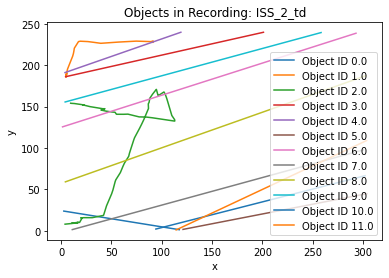

In [7]:
plot_rec("ISS_2_td")

# 16, 20, 21, 24, 26, 28, 30, 34, 35, 39

In [7]:
# Manually inputing the desired object_id for rows 15-47
object_id_values = [0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 4, 0]
# 21- 2, 30 - 4,41 - 2

# Updating the 'object_id' column for rows 15-47
df_w_obj.loc[15:48, 'object_id'] = object_id_values
df_w_obj_i = df_w_obj

# Calculating start_time, end_time, and traj_frames for rows 15-47
for index, row in df_w_obj_i.loc[15:48].iterrows():
    recording = dataset[row['name']]
    
    obj_field = recording['Obj']

    df_obj = pd.DataFrame({
        'x': np.asarray(obj_field['x'])[0, :],
        'y': np.asarray(obj_field['y'])[0, :],
        'id': np.asarray(obj_field['id'], dtype=np.int32)[0, :],
        'ts': np.asarray(obj_field['ts'], dtype=np.int64)[0, :]
        })
    df_obj['object_id'] = df_obj['id']
    df_obj['start_time'] = df_obj['ts'].min()
    df_obj['end_time'] = df_obj['ts'].max()

    # Calculating the number of frames
    initial_time = np.asarray(recording['TD']['ts'], dtype=np.int64)[0, 0]
    df_obj['traj_frames'] = len(df_obj)

    # Updating the original DataFrame with the new columns
    df_w_obj_i.loc[index, 'start_time'] = df_obj['start_time'].values[0]
    df_w_obj_i.loc[index, 'end_time'] = df_obj['end_time'].values[0]
    df_w_obj_i.loc[index, 'traj_frames'] = df_obj['traj_frames'].values[0]

In [8]:
df_w_obj_i

,name,sensor,xMax,yMax,nobj,initial_time,final_time,nFrames,object_id,start_time,end_time,traj_frames
0,20170214-20-58_22285_SL-16RB,DAVIS,240.0,180.0,1.0,1.889000e+04,9.533990e+07,9532.0,0.0,27408890.0,95328888.0,6793.0
1,daytime_geo_stare_1700_davis_td,DAVIS,240.0,180.0,1.0,4.227525e+09,4.898670e+09,67114.0,0.0,4669675008.0,4673325056.0,366.0
2,cosmos_1848_davis_td,DAVIS,240.0,180.0,1.0,2.169050e+09,2.273868e+09,10481.0,0.0,2170340352.0,2268290304.0,9796.0
3,mag-1.44sirius_atis_td,ATIS,304.0,240.0,1.0,2.970031e+09,3.021738e+09,5170.0,0.0,2970031104.0,3021721088.0,5170.0
4,mag0.87aldebaran_1912_atis_td,ATIS,304.0,240.0,1.0,4.507280e+08,5.256069e+08,7487.0,0.0,450758016.0,525588032.0,7484.0
5,mag3.02minkar_1958_atis_td,ATIS,304.0,240.0,1.0,1.509783e+09,1.540790e+09,3100.0,0.0,1509833344.0,1540773248.0,3095.0
6,mag4.46hip54682_1959_atis_td,ATIS,304.0,240.0,1.0,1.591152e+09,1.624870e+09,3371.0,0.0,1591431424.0,1619031552.0,2761.0
7,canopus_leos_11_26_davis_td,DAVIS,240.0,180.0,1.0,3.269350e+08,6.088678e+08,28193.0,0.0,330355008.0,602574976.0,27223.0
8,mag4.46hip54682_1959_davis_td,DAVIS,240.0,180.0,1.0,1.596990e+09,1.630709e+09,3371.0,0.0,1597270016.0,1624869888.0,2761.0
9,mag5.52hip50456_2001_davis_td,DAVIS,240.0,180.0,1.0,1.688031e+09,1.741750e+09,5371.0,0.0,1688261120.0,1741731072.0,5348.0


**Extracting the object name from the recording file name**

In [9]:
df_w_obj_i["observation name"] = df_w_obj["name"].str.split("_").str[:-2].str.join("_")
df_w_obj_i["object"] = df_w_obj["name"].str.split("_").str[0]
df_w_obj_i

,name,sensor,xMax,yMax,nobj,initial_time,final_time,nFrames,object_id,start_time,end_time,traj_frames,observation name,object
0,20170214-20-58_22285_SL-16RB,DAVIS,240.0,180.0,1.0,1.889000e+04,9.533990e+07,9532.0,0.0,27408890.0,95328888.0,6793.0,20170214-20-58,20170214-20-58
1,daytime_geo_stare_1700_davis_td,DAVIS,240.0,180.0,1.0,4.227525e+09,4.898670e+09,67114.0,0.0,4669675008.0,4673325056.0,366.0,daytime_geo_stare_1700,daytime
2,cosmos_1848_davis_td,DAVIS,240.0,180.0,1.0,2.169050e+09,2.273868e+09,10481.0,0.0,2170340352.0,2268290304.0,9796.0,cosmos_1848,cosmos
3,mag-1.44sirius_atis_td,ATIS,304.0,240.0,1.0,2.970031e+09,3.021738e+09,5170.0,0.0,2970031104.0,3021721088.0,5170.0,mag-1.44sirius,mag-1.44sirius
4,mag0.87aldebaran_1912_atis_td,ATIS,304.0,240.0,1.0,4.507280e+08,5.256069e+08,7487.0,0.0,450758016.0,525588032.0,7484.0,mag0.87aldebaran_1912,mag0.87aldebaran
5,mag3.02minkar_1958_atis_td,ATIS,304.0,240.0,1.0,1.509783e+09,1.540790e+09,3100.0,0.0,1509833344.0,1540773248.0,3095.0,mag3.02minkar_1958,mag3.02minkar
6,mag4.46hip54682_1959_atis_td,ATIS,304.0,240.0,1.0,1.591152e+09,1.624870e+09,3371.0,0.0,1591431424.0,1619031552.0,2761.0,mag4.46hip54682_1959,mag4.46hip54682
7,canopus_leos_11_26_davis_td,DAVIS,240.0,180.0,1.0,3.269350e+08,6.088678e+08,28193.0,0.0,330355008.0,602574976.0,27223.0,canopus_leos_11_26,canopus
8,mag4.46hip54682_1959_davis_td,DAVIS,240.0,180.0,1.0,1.596990e+09,1.630709e+09,3371.0,0.0,1597270016.0,1624869888.0,2761.0,mag4.46hip54682_1959,mag4.46hip54682
9,mag5.52hip50456_2001_davis_td,DAVIS,240.0,180.0,1.0,1.688031e+09,1.741750e+09,5371.0,0.0,1688261120.0,1741731072.0,5348.0,mag5.52hip50456_2001,mag5.52hip50456


**Comparing recordings using diff sensors: ATIS vs DAVIS**

In [10]:
observation = df_w_obj_i["observation name"]
observation_df = pd.DataFrame(observation)
observation_df['sensor'] = np.where((df_w_obj_i["sensor"] == "ATIS"), 1, 0)
observation_df

,observation name,sensor
0,20170214-20-58,0
1,daytime_geo_stare_1700,0
2,cosmos_1848,0
3,mag-1.44sirius,1
4,mag0.87aldebaran_1912,1
5,mag3.02minkar_1958,1
6,mag4.46hip54682_1959,1
7,canopus_leos_11_26,0
8,mag4.46hip54682_1959,0
9,mag5.52hip50456_2001,0


In [11]:

object_unique = df_w_obj_i["object"].unique()
object_df = pd.DataFrame({"unique object": object_unique})

count_df_atis = df_w_obj_i[df_w_obj_i['sensor'] == "ATIS"].groupby("object").size().reset_index(name='obv_no_in_ATIS')
count_df_davis = df_w_obj_i[df_w_obj_i['sensor'] == "DAVIS"].groupby("object").size().reset_index(name='obv_no_in_DAVIS')

object_df = pd.merge(object_df, count_df_atis, left_on='unique object', right_on='object', how='left')
object_df = pd.merge(object_df, count_df_davis, left_on='unique object', right_on='object', how='left')

object_df['obv_no_in_ATIS'] = object_df['obv_no_in_ATIS'].fillna(0).astype(int)
object_df['obv_no_in_DAVIS'] = object_df['obv_no_in_DAVIS'].fillna(0).astype(int)

# Drop the redundant "object" columns 
object_df = object_df.drop(columns=['object_x', 'object_y'])
object_df


,unique object,obv_no_in_ATIS,obv_no_in_DAVIS
0,20170214-20-58,0,1
1,daytime,0,1
2,cosmos,0,1
3,mag-1.44sirius,1,0
4,mag0.87aldebaran,1,0
5,mag3.02minkar,1,0
6,mag4.46hip54682,1,1
7,canopus,4,4
8,mag5.52hip50456,0,1
9,mag7.41hip50559,0,1


In [12]:
atis = df_w_obj_i[df_w_obj_i['sensor'] == 'ATIS'].reset_index(drop=True)
atis

,name,sensor,xMax,yMax,nobj,initial_time,final_time,nFrames,object_id,start_time,end_time,traj_frames,observation name,object
0,mag-1.44sirius_atis_td,ATIS,304.0,240.0,1.0,2.970031e+09,3.021738e+09,5170.0,0.0,2970031104.0,3021721088.0,5170.0,mag-1.44sirius,mag-1.44sirius
1,mag0.87aldebaran_1912_atis_td,ATIS,304.0,240.0,1.0,4.507280e+08,5.256069e+08,7487.0,0.0,450758016.0,525588032.0,7484.0,mag0.87aldebaran_1912,mag0.87aldebaran
2,mag3.02minkar_1958_atis_td,ATIS,304.0,240.0,1.0,1.509783e+09,1.540790e+09,3100.0,0.0,1509833344.0,1540773248.0,3095.0,mag3.02minkar_1958,mag3.02minkar
3,mag4.46hip54682_1959_atis_td,ATIS,304.0,240.0,1.0,1.591152e+09,1.624870e+09,3371.0,0.0,1591431424.0,1619031552.0,2761.0,mag4.46hip54682_1959,mag4.46hip54682
4,sl3rb_00877_1940_atis_td,ATIS,304.0,240.0,1.0,3.997417e+08,9.443195e+08,54457.0,0.0,427741696.0,561071680.0,13334.0,sl3rb_00877_1940,sl3rb
5,refslew_2106_atis_td,ATIS,304.0,240.0,2.0,7.355608e+07,1.054828e+08,3192.0,1,75966080,103986080,4868.0,refslew_2106,refslew
6,archenar_leos_1149_atis_td,ATIS,304.0,240.0,2.0,1.723003e+09,1.846079e+09,12307.0,0,1772933120,1846063104,7433.0,archenar_leos_1149,archenar
7,canopus_streaks_td_cleaned,ATIS,304.0,240.0,6.0,3.170000e+02,2.093149e+08,20931.0,0,317,209300320,21245.0,canopus_streaks,canopus
8,canopus_leos_11_26_atis_td,ATIS,304.0,240.0,7.0,3.274697e+08,6.093982e+08,28192.0,0,331069664,609379648,28511.0,canopus_leos_11_26,canopus
9,canopus_streaks_1558_atis_td,ATIS,304.0,240.0,11.0,4.074631e+08,5.591856e+08,15172.0,0,407463136,559173120,17304.0,canopus_streaks_1558,canopus


In [13]:
davis = df_w_obj_i[df_w_obj_i['sensor'] == 'DAVIS'].reset_index(drop=True)
davis

,name,sensor,xMax,yMax,nobj,initial_time,final_time,nFrames,object_id,start_time,end_time,traj_frames,observation name,object
0,20170214-20-58_22285_SL-16RB,DAVIS,240.0,180.0,1.0,1.889000e+04,9.533990e+07,9532.0,0.0,27408890.0,95328888.0,6793.0,20170214-20-58,20170214-20-58
1,daytime_geo_stare_1700_davis_td,DAVIS,240.0,180.0,1.0,4.227525e+09,4.898670e+09,67114.0,0.0,4669675008.0,4673325056.0,366.0,daytime_geo_stare_1700,daytime
2,cosmos_1848_davis_td,DAVIS,240.0,180.0,1.0,2.169050e+09,2.273868e+09,10481.0,0.0,2170340352.0,2268290304.0,9796.0,cosmos_1848,cosmos
3,canopus_leos_11_26_davis_td,DAVIS,240.0,180.0,1.0,3.269350e+08,6.088678e+08,28193.0,0.0,330355008.0,602574976.0,27223.0,canopus_leos_11_26,canopus
4,mag4.46hip54682_1959_davis_td,DAVIS,240.0,180.0,1.0,1.596990e+09,1.630709e+09,3371.0,0.0,1597270016.0,1624869888.0,2761.0,mag4.46hip54682_1959,mag4.46hip54682
5,mag5.52hip50456_2001_davis_td,DAVIS,240.0,180.0,1.0,1.688031e+09,1.741750e+09,5371.0,0.0,1688261120.0,1741731072.0,5348.0,mag5.52hip50456_2001,mag5.52hip50456
6,mag7.41hip50559_2003_davis_td,DAVIS,240.0,180.0,1.0,1.813680e+09,1.846970e+09,3328.0,0.0,1815180160.0,1843920128.0,2875.0,mag7.41hip50559_2003,mag7.41hip50559
7,geostarelong_abs6_2022_davis_td,DAVIS,240.0,180.0,1.0,1.949540e+09,2.051872e+09,10233.0,0.0,2017210368.0,2049740288.0,3254.0,geostarelong_abs6_2022,geostarelong
8,refslew_2106_davis_td,DAVIS,240.0,180.0,1.0,8.498005e+07,1.169092e+08,3192.0,0.0,104470048.0,107490048.0,303.0,refslew_2106,refslew
9,SL14RB_leap_1933_davis_td,DAVIS,240.0,180.0,1.0,1.716310e+09,1.803310e+09,8699.0,0.0,1716470016.0,1717160064.0,70.0,SL14RB_leap_1933,SL14RB


**Plotting the trajectories**

In [14]:
import matplotlib.pyplot as plt

def plot_rec_obj(name, object_id=None):
    recording_data = dataset[name]
    object_data = recording_data["Obj"]

    xCoords = np.asarray(object_data['x'])[0, :]
    yCoords = np.asarray(object_data['y'])[0, :]
    ids = np.asarray(object_data['id'], dtype=np.int32)[0, :]
    ts = np.asarray(object_data['ts'], dtype=np.int64)[0, :]

    df_rec = pd.DataFrame({
        "x": xCoords,
        "y": yCoords,
        "id": ids,
        "ts": ts 
    })

    xCoords_td = np.asarray(recording_data['TD']['x'])[0, :]
    yCoords_td = np.asarray(recording_data['TD']['y'])[0, :]
    p = np.asarray(recording_data['TD']['p'])[0, :]
    ts_td = np.asarray(recording_data['TD']['ts'])[0, :]

    df_rec_td = pd.DataFrame({
        "x": xCoords_td,
        "y": yCoords_td,
        "p": p,
        "ts": ts_td 
    })

    if object_id is not None:
        # Plot only the specified object ID
        df_plot = df_rec[df_rec["id"] == object_id]
        plt.plot(df_plot['x'], df_plot['y'], label=f"Object ID {object_id}")
    else:
        # Plot all objects
        nobj = df_rec["id"].nunique()
        for i in np.arange(nobj):
            df_plot = df_rec[df_rec["id"] == i]
            plt.plot(df_plot['x'], df_plot['y'], label=f"Object ID {i}")

    plt.legend(loc="best")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Objects in Recording: {name}')
    plt.show()

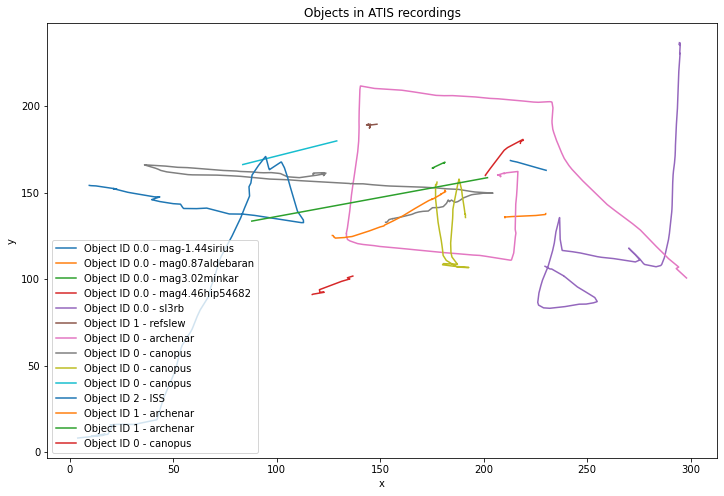

In [15]:
atis = df_w_obj_i[df_w_obj_i['sensor'] == 'ATIS'].reset_index(drop=True)

df_combined = pd.DataFrame()

plt.figure(figsize=(12, 8))

# Iterate through all rows in the filtered atis DataFrame
for _, row in atis.iterrows():
    recording_data = dataset[row['name']]
    object_id_to_show = row['object_id']

    xCoords_all = np.asarray(recording_data['Obj']['x'])[0, :]
    yCoords_all = np.asarray(recording_data['Obj']['y'])[0, :]
    ids_all = np.asarray(recording_data['Obj']['id'], dtype=np.int32)[0, :]

    xCoords = xCoords_all[recording_data['Obj']['id'][0, :] == object_id_to_show]
    yCoords = yCoords_all[recording_data['Obj']['id'][0, :] == object_id_to_show]
    ids = ids_all[recording_data['Obj']['id'][0, :] == object_id_to_show].astype(np.int32)

    df_rec = pd.DataFrame()
    df_rec["x"] = xCoords
    df_rec["y"] = yCoords
    df_rec["id"] = ids

    df_combined = pd.concat([df_combined, df_rec])

    plt.plot(df_rec['x'], df_rec['y'], label=f"Object ID {object_id_to_show} - {row['object']}")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Objects in ATIS recordings')
plt.show()


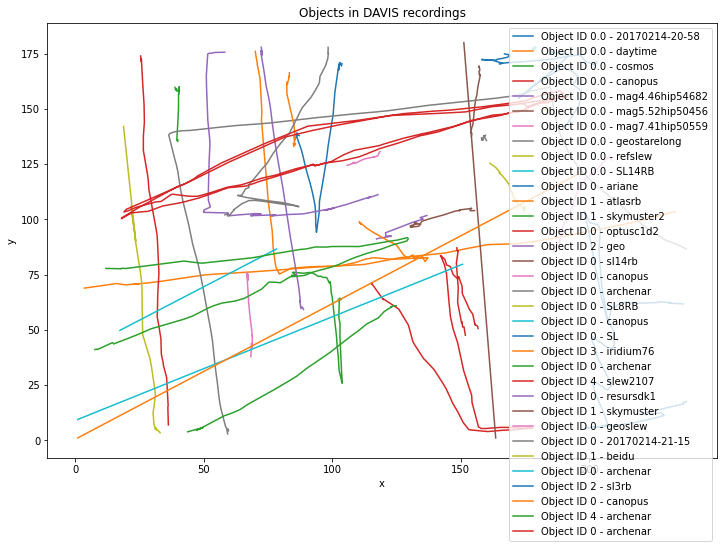

In [16]:
davis = df_w_obj_i[df_w_obj_i['sensor'] == 'DAVIS'].reset_index(drop=True)

df_combined = pd.DataFrame()

plt.figure(figsize=(12, 8))

# Iterate through all rows in the filtered davis DataFrame
for _, row in davis.iterrows():
    recording_data = dataset[row['name']]
    object_id_to_show = row['object_id']

    xCoords_all = np.asarray(recording_data['Obj']['x'])[0, :]
    yCoords_all = np.asarray(recording_data['Obj']['y'])[0, :]
    ids_all = np.asarray(recording_data['Obj']['id'], dtype=np.int32)[0, :]

    xCoords = xCoords_all[recording_data['Obj']['id'][0, :] == object_id_to_show]
    yCoords = yCoords_all[recording_data['Obj']['id'][0, :] == object_id_to_show]
    ids = ids_all[recording_data['Obj']['id'][0, :] == object_id_to_show].astype(np.int32)

    df_rec = pd.DataFrame()
    df_rec["x"] = xCoords
    df_rec["y"] = yCoords
    df_rec["id"] = ids

    df_combined = pd.concat([df_combined, df_rec])

    plt.plot(df_rec['x'], df_rec['y'], label=f"Object ID {object_id_to_show} - {row['object']}")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Objects in DAVIS recordings')
plt.show()


/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_25990/911911089.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frame_numbers = np.floor((ts - initial_time) / 1e4).astype(np.int)
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_25990/911911089.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. I

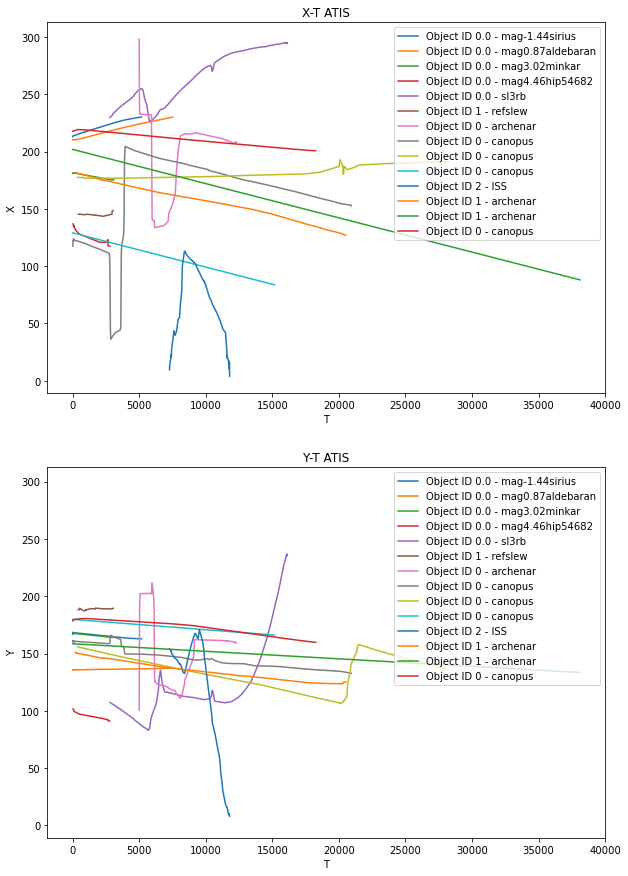

In [17]:
atis = df_w_obj_i[df_w_obj_i['sensor'] == 'ATIS'].reset_index(drop=True)

# Create subplots
fig, (ax_x, ax_y) = plt.subplots(2, 1, figsize=(10, 15), sharey=True)

# Iterate through all rows in the filtered atis DataFrame
for _, row in atis.iterrows():
    recording_data = dataset[row['name']]
    object_id_to_show = row['object_id']
    nFrames = row['nFrames']
    initial_time = row['initial_time']

    xCoords_all = np.asarray(recording_data['Obj']['x'])[0, :]
    yCoords_all = np.asarray(recording_data['Obj']['y'])[0, :]
    ts_all = np.asarray(recording_data['Obj']['ts'], dtype=np.int64)[0, :]
    ids_all = np.asarray(recording_data['Obj']['id'], dtype=np.int32)[0, :]

    # Extract data for the specific object
    xCoords = xCoords_all[ids_all == object_id_to_show]
    yCoords = yCoords_all[ids_all == object_id_to_show]
    ts = ts_all[ids_all == object_id_to_show]

    # Find the frame number corresponding to each timestamp
    frame_numbers = np.floor((ts - initial_time) / 1e4).astype(np.int)

    # Plot xCoords against frame_numbers
    ax_x.plot(frame_numbers, xCoords, label=f"Object ID {object_id_to_show} - {row['object']}")

    # Plot yCoords against frame_numbers
    ax_y.plot(frame_numbers, yCoords, label=f"Object ID {object_id_to_show} - {row['object']}")

# Show legends and labels
ax_x.legend()
ax_y.legend()
ax_x.set_xlabel('T')
ax_y.set_xlabel('T')
ax_x.set_ylabel('X')
ax_y.set_ylabel('Y')
ax_x.set_title('X-T ATIS')
ax_y.set_title('Y-T ATIS')
plt.show()


/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_25990/2917014023.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frame_numbers = np.floor((ts - initial_time) / 1e4).astype(np.int)
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_25990/2917014023.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

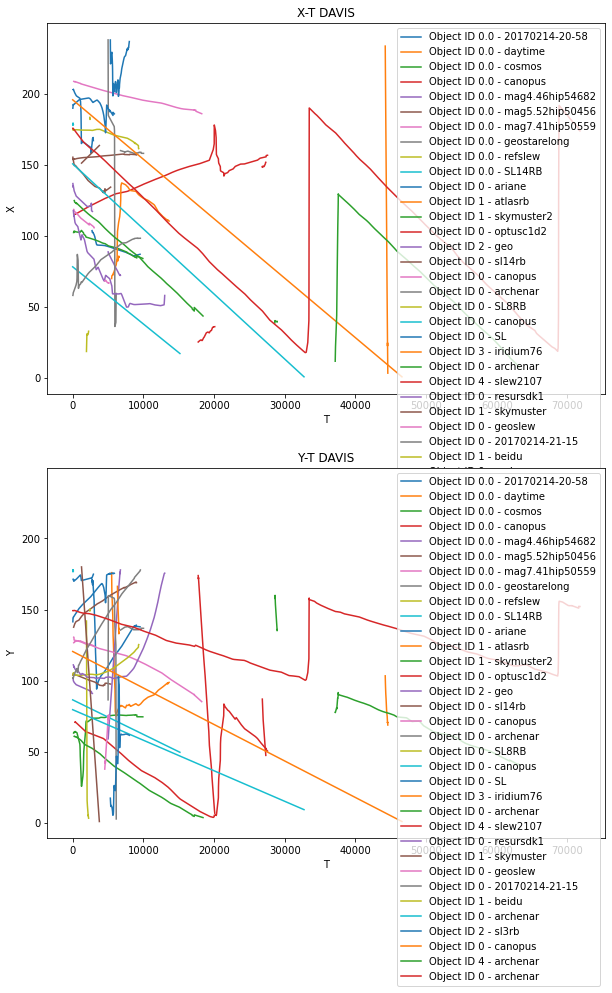

In [18]:
fig, (ax_x, ax_y) = plt.subplots(2, 1, figsize=(10, 15), sharey=True)

# Iterate through all rows in the filtered davis DataFrame
davis = df_w_obj_i[df_w_obj_i['sensor'] == 'DAVIS'].reset_index(drop=True)
for _, row in davis.iterrows():
    recording_data = dataset[row['name']]
    object_id_to_show = row['object_id']
    nFrames = row['nFrames']
    initial_time = row['initial_time']

    xCoords_all = np.asarray(recording_data['Obj']['x'])[0, :]
    yCoords_all = np.asarray(recording_data['Obj']['y'])[0, :]
    ts_all = np.asarray(recording_data['Obj']['ts'], dtype=np.int64)[0, :]
    ids_all = np.asarray(recording_data['Obj']['id'], dtype=np.int32)[0, :]

    xCoords = xCoords_all[ids_all == object_id_to_show]
    yCoords = yCoords_all[ids_all == object_id_to_show]
    ts = ts_all[ids_all == object_id_to_show]

    # Find the frame number corresponding to each timestamp
    frame_numbers = np.floor((ts - initial_time) / 1e4).astype(np.int)

    # Plot xCoords against frame_numbers
    ax_x.plot(frame_numbers, xCoords, label=f"Object ID {object_id_to_show} - {row['object']}")

    # Plot yCoords against frame_numbers
    ax_y.plot(frame_numbers, yCoords, label=f"Object ID {object_id_to_show} - {row['object']}")

# Show legends and labels
ax_x.legend()
ax_y.legend()
ax_x.set_xlabel('T')
ax_y.set_xlabel('T')
ax_x.set_ylabel('X')
ax_y.set_ylabel('Y')
ax_x.set_title('X-T DAVIS')
ax_y.set_title('Y-T DAVIS')
plt.show()


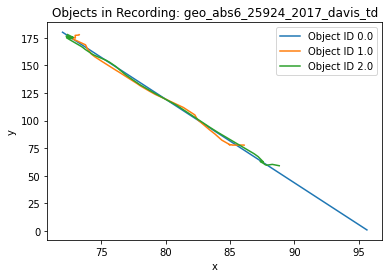

In [19]:
plot_rec('geo_abs6_25924_2017_davis_td')

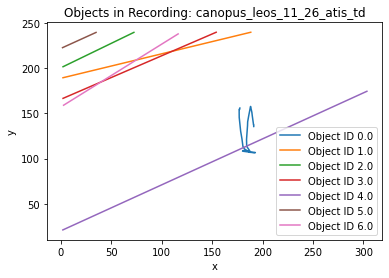

In [20]:
plot_rec('canopus_leos_11_26_atis_td')

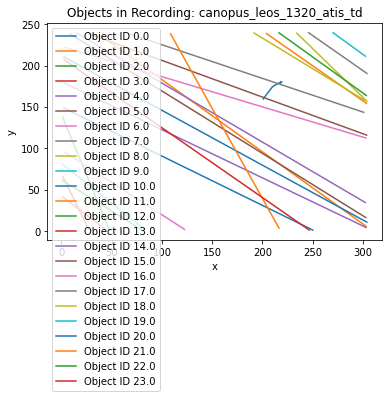

In [21]:
plot_rec('canopus_leos_1320_atis_td')

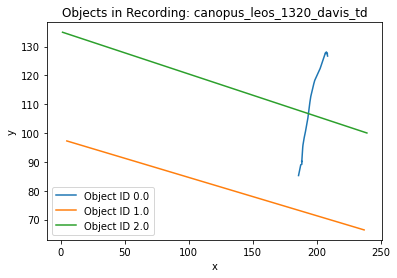

In [22]:
plot_rec('canopus_leos_1320_davis_td')

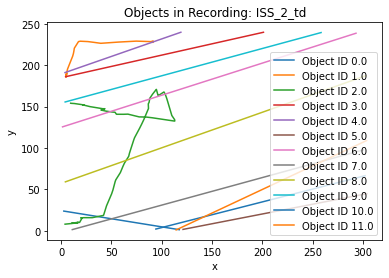

In [23]:
plot_rec('ISS_2_td')

**Extracting the ABS-6 satellite recording data**

We opted for this geosynchronous satellite since it is the only spacecraft where the data for its date, time, and place of recording are provided.

In [24]:
# Recording data

mat_file = 'geo_abs6_25924_2017_davis_td_labelled.mat'
mat_data = scipy.io.loadmat(mat_file)

td_data = mat_data['TD'][0, 0]

td_df = pd.DataFrame({
    'x': td_data['x'][0:730397].squeeze().tolist(),
    'y': td_data['y'][0:730397].squeeze().tolist(),
    'ts': td_data['ts'][0:730397].squeeze().tolist(),
    'p': td_data['p'][0:730397].squeeze().tolist()
})

td_df


,x,y,ts,p
0,61,148,1614140046,-1
1,164,153,1614140078,1
2,102,155,1614140157,1
3,195,31,1614140172,1
4,51,96,1614140365,1
...,...,...,...,...
730391,61,99,1688387467,1
730392,61,148,1688389153,1
730393,115,69,1688389270,1
730394,118,134,1688389467,1


In [26]:
# Converting microsencods timestamps to UTC

base_timestamp = pd.to_datetime('2017-06-04 10:47:20').tz_localize('UTC')
td_df['ts'] = base_timestamp + pd.to_timedelta(td_df['ts'], unit='us')
td_df_utc = td_df
td_df_utc.head()

,x,y,ts,p
0,61,148,2017-06-04 11:14:14.140046+00:00,-1
1,164,153,2017-06-04 11:14:14.140078+00:00,1
2,102,155,2017-06-04 11:14:14.140157+00:00,1
3,195,31,2017-06-04 11:14:14.140172+00:00,1
4,51,96,2017-06-04 11:14:14.140365+00:00,1


In [27]:
# Object data

Obj_data = mat_data['Obj'][0, 0]

Obj_df = pd.DataFrame({
    'x': Obj_data['x'][0:5664].squeeze().tolist(),
    'y': Obj_data['y'][0:5664].squeeze().tolist(),
    'id': Obj_data['id'][0:5664].squeeze().tolist(),
    'ts': Obj_data['ts'][0:5664].squeeze().tolist(),
})

geo_abs_df = Obj_df[Obj_df['id'] == 0]

base_timestamp = pd.to_datetime('2017-06-04 10:47:20').tz_localize('UTC')
geo_abs_df['ts'] = base_timestamp + pd.to_timedelta(geo_abs_df['ts'], unit='us')
geo_abs_df_utc = geo_abs_df
geo_abs_df_utc

/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_13548/2496838392.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_abs_df['ts'] = base_timestamp + pd.to_timedelta(geo_abs_df['ts'], unit='us')


,x,y,id,ts
0,95.633289,1.059382,0,2017-06-04 11:14:16.510080+00:00
1,95.623836,1.130896,0,2017-06-04 11:14:16.520064+00:00
2,95.614383,1.202410,0,2017-06-04 11:14:16.530048+00:00
3,95.604930,1.273923,0,2017-06-04 11:14:16.540032+00:00
4,95.595478,1.345437,0,2017-06-04 11:14:16.550016+00:00
...,...,...,...,...
2498,72.020327,179.700842,0,2017-06-04 11:14:41.490048+00:00
2499,72.010874,179.772355,0,2017-06-04 11:14:41.500032+00:00
2500,72.001421,179.843869,0,2017-06-04 11:14:41.510016+00:00
2501,71.991968,179.915383,0,2017-06-04 11:14:41.520000+00:00


In [28]:
last_value = geo_abs_df_utc.iloc[-1]
last_value

x                            71.982516
y                           179.986897
id                                   0
ts    2017-06-04 11:14:41.529984+00:00
Name: 2502, dtype: object

From here, calculate the azimuth and elevation and try to recreate the plot in [2]. After that, simulate it in QC

**Updated plots with UTC timestamp**

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rec_obj(name, object_ids=None):
    recording_data = dataset[name]
    object_data = recording_data["Obj"]

    xCoords = np.asarray(object_data['x'])[0, :]
    yCoords = np.asarray(object_data['y'])[0, :]
    ids = np.asarray(object_data['id'], dtype=np.int32)[0, :]
    ts = np.asarray(object_data['ts'], dtype=np.int64)[0, :]

    df_rec = pd.DataFrame({
        "x": xCoords,
        "y": yCoords,
        "id": ids,
        "ts": ts 
    })

    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(12, 8))

    if object_ids is not None:
        for object_id in object_ids:
            # Plot only the specified object ID
            df_plot = df_rec[df_rec["id"] == object_id]
            plt.plot(df_plot['x'], df_plot['y'], label=f"Object ID {object_id}")

            plt.scatter(df_plot['x'].iloc[0], df_plot['y'].iloc[0], color='red', marker='o', s=50)
            plt.scatter(df_plot['x'].iloc[-1], df_plot['y'].iloc[-1], color='blue', marker='o', s=50)
            
            start_utc = pd.to_datetime('2017-06-04 10:47:20', utc=True) + pd.to_timedelta(df_plot['ts'].iloc[0], unit='us')
            end_utc = pd.to_datetime('2017-06-04 10:47:20', utc=True) + pd.to_timedelta(df_plot['ts'].iloc[-1], unit='us')

            plt.annotate(f'Start: {start_utc}', 
                         (df_plot['x'].iloc[0], df_plot['y'].iloc[0]), 
                         textcoords="offset points", xytext=(-10,-10), 
                         ha='center', fontsize=8, color='red')

            plt.annotate(f'End: {end_utc}', 
                         (df_plot['x'].iloc[-1], df_plot['y'].iloc[-1]), 
                         textcoords="offset points", xytext=(10,5), 
                         ha='center', fontsize=8, color='blue')

    plt.legend(loc="best")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Objects in Recording: {name}')

    plt.show()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rec_obj(name, object_ids=None):
    recording_data = dataset[name]
    object_data = recording_data["Obj"]

    xCoords = np.asarray(object_data['x'])[0, :]
    yCoords = np.asarray(object_data['y'])[0, :]
    ids = np.asarray(object_data['id'], dtype=np.int32)[0, :]
    ts = np.asarray(object_data['ts'], dtype=np.int64)[0, :]

    df_rec = pd.DataFrame({
        "x": xCoords,
        "y": yCoords,
        "id": ids,
        "ts": ts 
    })

    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(12, 8))

    if object_ids is not None:
        for object_id in object_ids:
            # Plot only the specified object ID
            df_plot = df_rec[df_rec["id"] == object_id]
            plt.plot(df_plot['x'], df_plot['y'], label=f"Object ID {object_id}")

            plt.scatter(df_plot['x'].iloc[0], df_plot['y'].iloc[0], color='red', marker='o', s=50)
            plt.scatter(df_plot['x'].iloc[-1], df_plot['y'].iloc[-1], color='blue', marker='o', s=50)
            
            start_utc = pd.to_datetime('2017-06-04 10:47:20', utc=True) + pd.to_timedelta(df_plot['ts'].iloc[0], unit='us')
            end_utc = pd.to_datetime('2017-06-04 10:47:20', utc=True) + pd.to_timedelta(df_plot['ts'].iloc[-1], unit='us')

            plt.annotate(f'Start: {start_utc}', 
                         (df_plot['x'].iloc[0], df_plot['y'].iloc[0]), 
                         textcoords="offset points", xytext=(-10,-10), 
                         ha='center', fontsize=10, color='red')

            plt.annotate(f'End: {end_utc}', 
                         (df_plot['x'].iloc[-1], df_plot['y'].iloc[-1]), 
                         textcoords="offset points", xytext=(10,5), 
                         ha='center', fontsize=10, color='blue')

    plt.legend(loc="best")
    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

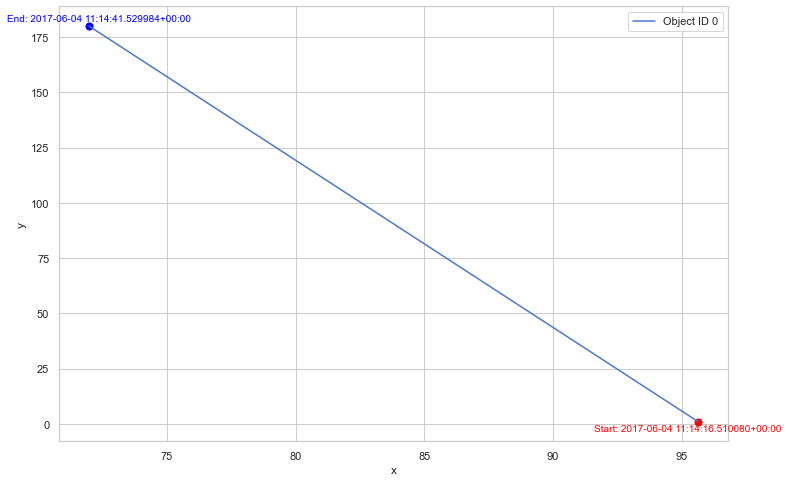

In [9]:
plot_rec_obj('geo_abs6_25924_2017_davis_td', [0])

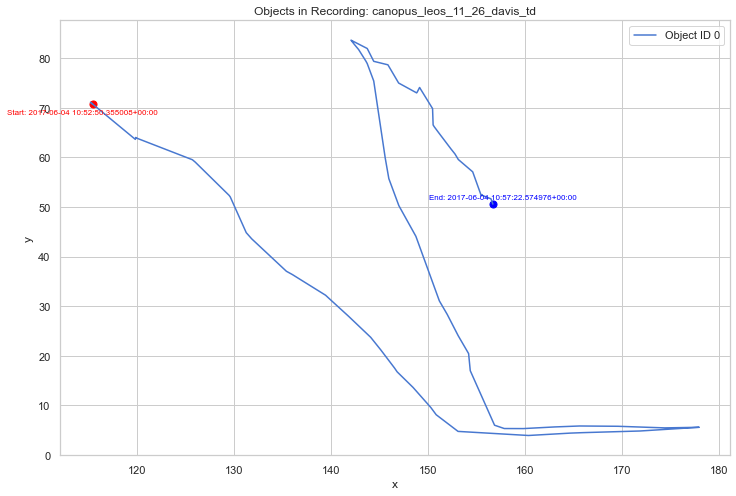

In [31]:
plot_rec_obj('canopus_leos_11_26_davis_td', [0])

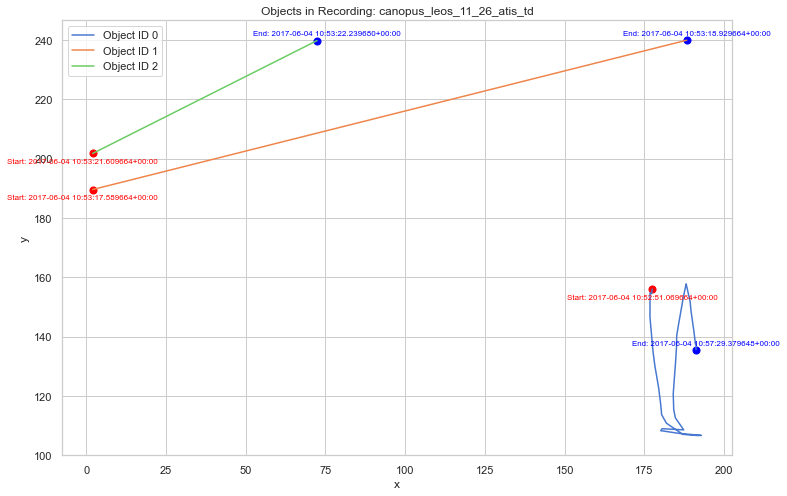

In [32]:
plot_rec_obj('canopus_leos_11_26_atis_td', [0,1,2])

In [33]:
# Recording data

mat_file = 'canopus_leos_1320_davis_td_labelled.mat'
mat_data = scipy.io.loadmat(mat_file)

td_data = mat_data['TD'][0, 0]

td_df = pd.DataFrame({
    'x': td_data['x'][0:730397].squeeze().tolist(),
    'y': td_data['y'][0:730397].squeeze().tolist(),
    'ts': td_data['ts'][0:730397].squeeze().tolist(),
    'p': td_data['p'][0:730397].squeeze().tolist()
})

# Converting microsencods timestamps to UTC

base_timestamp = pd.to_datetime('2017-06-04 10:47:20').tz_localize('UTC')
td_df['ts'] = base_timestamp + pd.to_timedelta(td_df['ts'], unit='us')
td_df_utc = td_df


# Object data
Obj_data = mat_data['Obj'][0, 0]

Obj_df = pd.DataFrame({
    'x': Obj_data['x'][0:18174].squeeze().tolist(),
    'y': Obj_data['y'][0:18174].squeeze().tolist(),
    'id': Obj_data['id'][0:18174].squeeze().tolist(),
    'ts': Obj_data['ts'][0:18174].squeeze().tolist(),
})

canopus_davis = Obj_df[Obj_df['id'] == 0]

base_timestamp = pd.to_datetime('2017-06-04 10:47:20').tz_localize('UTC')
delta = pd.to_timedelta(canopus_davis['ts'], unit='us')
canopus_davis['ts'] = base_timestamp + delta
canopus_davis


/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_13548/3964814408.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canopus_davis['ts'] = base_timestamp + delta


,x,y,id,ts
0,208.612396,126.693153,0,2017-06-04 10:48:15.120768+00:00
1,208.610242,126.698899,0,2017-06-04 10:48:15.130768+00:00
2,208.608087,126.704645,0,2017-06-04 10:48:15.140768+00:00
3,208.605932,126.710391,0,2017-06-04 10:48:15.150768+00:00
4,208.603778,126.716136,0,2017-06-04 10:48:15.160768+00:00
...,...,...,...,...
18169,185.912201,85.299032,0,2017-06-04 10:51:16.120768+00:00
18170,185.910111,85.294530,0,2017-06-04 10:51:16.130768+00:00
18171,185.908020,85.290027,0,2017-06-04 10:51:16.140768+00:00
18172,185.905930,85.285524,0,2017-06-04 10:51:16.150768+00:00


In [34]:
canopus_leo1 = Obj_df[Obj_df['id'] == 1]

base_timestamp = pd.to_datetime('2017-06-04 10:47:20').tz_localize('UTC')
delta = pd.to_timedelta(canopus_leo1['ts'], unit='us')
canopus_leo1['ts'] = base_timestamp + delta
canopus_leo1

/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_13548/2657383177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canopus_leo1['ts'] = base_timestamp + delta


,x,y,id,ts
11302,4.740532,97.276166,1,2017-06-04 10:50:08.130768+00:00
11304,10.700806,96.485466,1,2017-06-04 10:50:08.140768+00:00
11306,16.661079,95.694766,1,2017-06-04 10:50:08.150768+00:00
11308,22.621353,94.904067,1,2017-06-04 10:50:08.160768+00:00
11310,28.581627,94.113367,1,2017-06-04 10:50:08.170768+00:00
11312,34.541900,93.322667,1,2017-06-04 10:50:08.180768+00:00
11314,40.502174,92.531968,1,2017-06-04 10:50:08.190768+00:00
11316,46.462447,91.741268,1,2017-06-04 10:50:08.200768+00:00
11318,52.422721,90.950568,1,2017-06-04 10:50:08.210768+00:00
11320,58.382995,90.159869,1,2017-06-04 10:50:08.220768+00:00


In [35]:
canopus_leo2 = Obj_df[Obj_df['id'] == 2]

base_timestamp = pd.to_datetime('2017-06-04 10:47:20').tz_localize('UTC')
delta = pd.to_timedelta(canopus_leo2['ts'], unit='us')
canopus_leo2['ts'] = base_timestamp + delta
canopus_leo2

/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_13548/64040150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canopus_leo2['ts'] = base_timestamp + delta


,x,y,id,ts
13743,1.389778,134.947660,2,2017-06-04 10:50:32.140768+00:00
13745,9.888828,133.700672,2,2017-06-04 10:50:32.150768+00:00
13747,18.387878,132.453684,2,2017-06-04 10:50:32.160768+00:00
13749,26.886928,131.206696,2,2017-06-04 10:50:32.170768+00:00
13751,35.385978,129.959708,2,2017-06-04 10:50:32.180768+00:00
13753,43.885028,128.712720,2,2017-06-04 10:50:32.190768+00:00
13755,52.384078,127.465732,2,2017-06-04 10:50:32.200768+00:00
13757,60.883128,126.218744,2,2017-06-04 10:50:32.210768+00:00
13759,69.382178,124.971756,2,2017-06-04 10:50:32.220768+00:00
13761,77.881228,123.724768,2,2017-06-04 10:50:32.230768+00:00


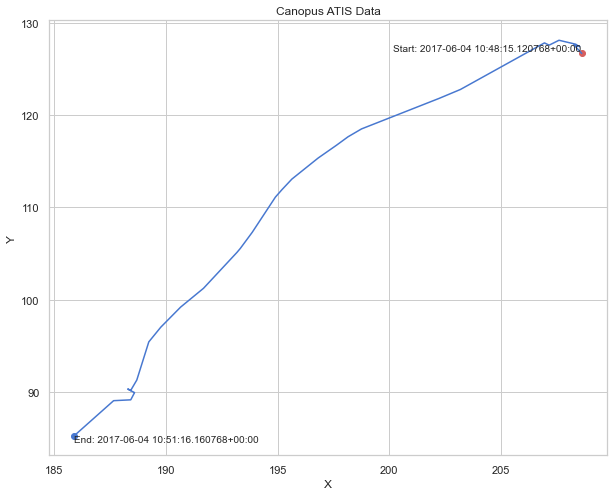

In [36]:
import matplotlib.pyplot as plt

# Assuming canopus_atis has 'x' and 'y' columns representing coordinates
plt.figure(figsize=(10, 8))
plt.plot(canopus_davis['x'], canopus_davis['y'], linestyle='-', color='b')
first_point = canopus_davis.iloc[0]
last_point = canopus_davis.iloc[-1]
plt.scatter(first_point['x'], first_point['y'], color='r')
plt.scatter(last_point['x'], last_point['y'], color='b')
plt.text(first_point['x'], first_point['y'], f"Start: {first_point['ts']}", fontsize=10, ha='right', va='bottom')
plt.text(last_point['x'], last_point['y'], f"End: {last_point['ts']}", fontsize=10, ha='left', va='top')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Canopus ATIS Data')
plt.grid(True)
plt.show()


In [37]:
first_timestamp_leo1 = canopus_leo1.iloc[0]['ts']
last_timestamp_leo1 = canopus_leo1.iloc[-1]['ts']

first_timestamp_leo2 = canopus_leo2.iloc[0]['ts']
last_timestamp_leo2 = canopus_leo2.iloc[-1]['ts']

matches_first_leo1 = canopus_davis[canopus_davis['ts'] == first_timestamp_leo1]
matches_last_leo1 = canopus_davis[canopus_davis['ts'] == last_timestamp_leo1]

matches_first_leo2 = canopus_davis[canopus_davis['ts'] == first_timestamp_leo2]
matches_last_leo2 = canopus_davis[canopus_davis['ts'] == last_timestamp_leo2]

x_first_leo1 = matches_first_leo1['x'].values[0]
y_first_leo1 = matches_first_leo1['y'].values[0]
x_last_leo1 = matches_last_leo1['x'].values[0]
y_last_leo1 = matches_last_leo1['y'].values[0]

x_first_leo2 = matches_first_leo2['x'].values[0]
y_first_leo2 = matches_first_leo2['y'].values[0]
x_last_leo2 = matches_last_leo2['x'].values[0]
y_last_leo2 = matches_last_leo2['y'].values[0]

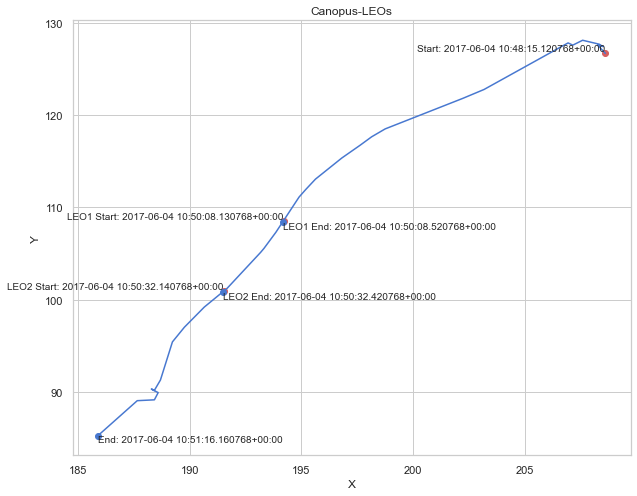

In [66]:
plt.figure(figsize=(10, 8))
plt.plot(canopus_davis['x'], canopus_davis['y'], linestyle='-', color='b')
first_point = canopus_davis.iloc[0]
last_point = canopus_davis.iloc[-1]
plt.scatter(first_point['x'], first_point['y'], color='r')
plt.scatter(last_point['x'], last_point['y'], color='b')
plt.text(first_point['x'], first_point['y'], f"Start: {first_point['ts']}", fontsize=10, ha='right', va='bottom')
plt.text(last_point['x'], last_point['y'], f"End: {last_point['ts']}", fontsize=10, ha='left', va='top')

plt.scatter(x_first_leo1, y_first_leo1, color='r')
plt.scatter(x_last_leo1, y_last_leo1, color='b')
plt.text(x_first_leo1, y_first_leo1, f"LEO1 Start: {first_timestamp_leo1}", fontsize=10, ha='right', va='bottom')
plt.text(x_last_leo1, y_last_leo1, f"LEO1 End: {last_timestamp_leo1}", fontsize=10, ha='left', va='top')

plt.scatter(x_first_leo2, y_first_leo2, color='r')
plt.scatter(x_last_leo2, y_last_leo2, color='b')
plt.text(x_first_leo2, y_first_leo2, f"LEO2 Start: {first_timestamp_leo2}", fontsize=10, ha='right', va='bottom')
plt.text(x_last_leo2, y_last_leo2, f"LEO2 End: {last_timestamp_leo2}", fontsize=10, ha='left', va='top')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Canopus-LEOs')
plt.grid(True)
plt.show()


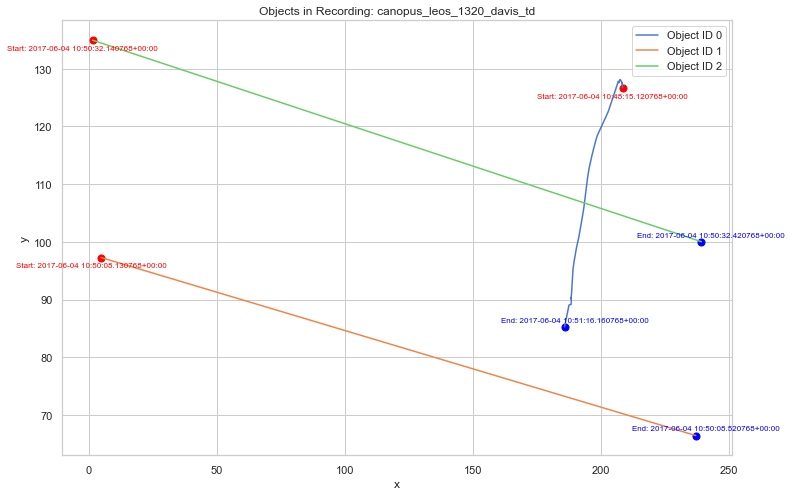

In [39]:
plot_rec_obj('canopus_leos_1320_davis_td', [0,1,2])

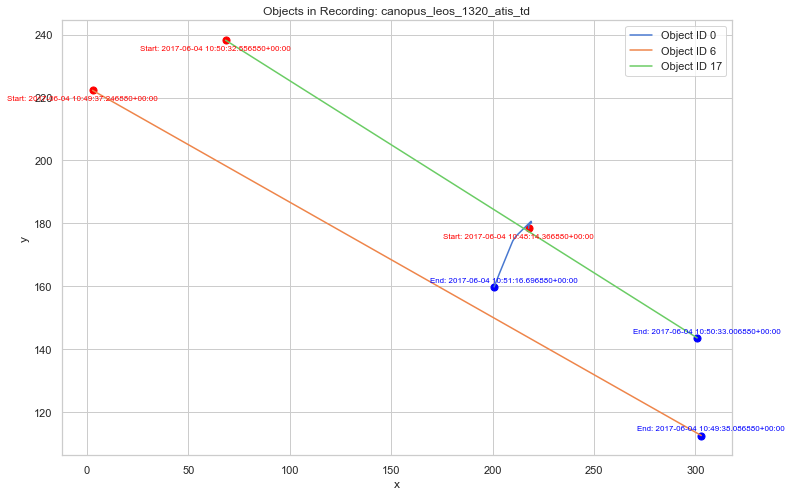

In [40]:
plot_rec_obj('canopus_leos_1320_atis_td', [0,6,17])

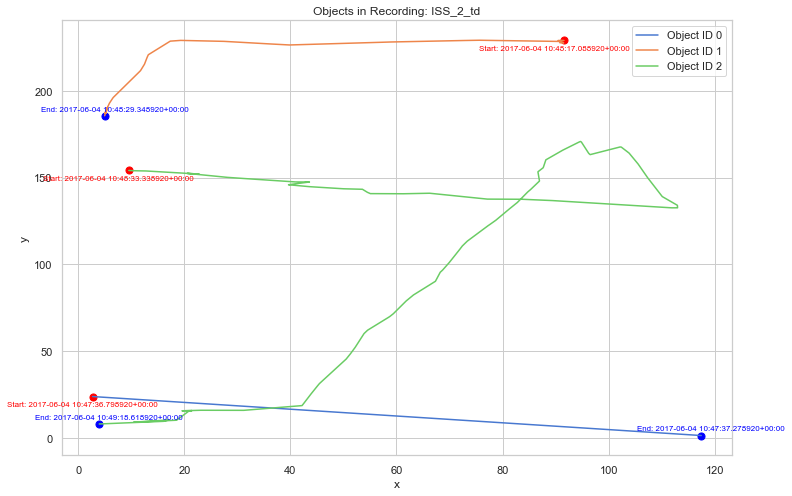

In [41]:
plot_rec_obj('ISS_2_td', [0,1,2])

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rec_obj_1(name, object_ids=None):
    recording_data = dataset[name]
    object_data = recording_data["Obj"]

    xCoords = np.asarray(object_data['x'])[0, :]
    yCoords = np.asarray(object_data['y'])[0, :]
    ids = np.asarray(object_data['id'], dtype=np.int32)[0, :]
    ts = np.asarray(object_data['ts'], dtype=np.int64)[0, :]

    df_rec = pd.DataFrame({
        "x": xCoords,
        "y": yCoords,
        "id": ids,
        "ts": ts 
    })

    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(12, 8))

    if object_ids is not None:
        for object_id in object_ids:
            # Plot only the specified object ID
            df_plot = df_rec[df_rec["id"] == object_id]
            plt.plot(df_plot['x'], df_plot['y'], label=f"Object ID {object_id}")

            plt.scatter(df_plot['x'].iloc[0], df_plot['y'].iloc[0], color='red', marker='o', s=50)
            plt.scatter(df_plot['x'].iloc[-1], df_plot['y'].iloc[-1], color='blue', marker='o', s=50)
            
            start_utc = pd.to_datetime('2017-06-04 10:47:20', utc=True) + pd.to_timedelta(df_plot['ts'].iloc[0], unit='us')
            end_utc = pd.to_datetime('2017-06-04 10:47:20', utc=True) + pd.to_timedelta(df_plot['ts'].iloc[-1], unit='us')

            plt.annotate(f'Start: {start_utc}', 
                         (df_plot['x'].iloc[0], df_plot['y'].iloc[0]), 
                         textcoords="offset points", xytext=(-10,-10), 
                         ha='center', fontsize=8, color='red')

            plt.annotate(f'End: {end_utc}', 
                         (df_plot['x'].iloc[-1], df_plot['y'].iloc[-1]), 
                         textcoords="offset points", xytext=(10,5), 
                         ha='center', fontsize=8, color='blue')
            
            # Adding more points in between
            interval = (df_plot['ts'].iloc[-1] - df_plot['ts'].iloc[0]) / 5
            for i in range(1, 4):  # Exclude start and end points
                timestamp = pd.to_datetime('2017-06-04 10:47:20', utc=True) + pd.to_timedelta(df_plot['ts'].iloc[0] + i * interval, unit='us')
                x = df_plot['x'].iloc[0] + (df_plot['x'].iloc[-1] - df_plot['x'].iloc[0]) * (i/5)
                y = df_plot['y'].iloc[0] + (df_plot['y'].iloc[-1] - df_plot['y'].iloc[0]) * (i/5)
                plt.scatter(x, y, color='green', marker='o', s=50)
                plt.annotate(f'{timestamp}', 
                             (x, y), 
                             textcoords="offset points", xytext=(10,5), 
                             ha='center', fontsize=8, color='green')

    plt.legend(loc="best")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Objects in Recording: {name}')

    plt.show()


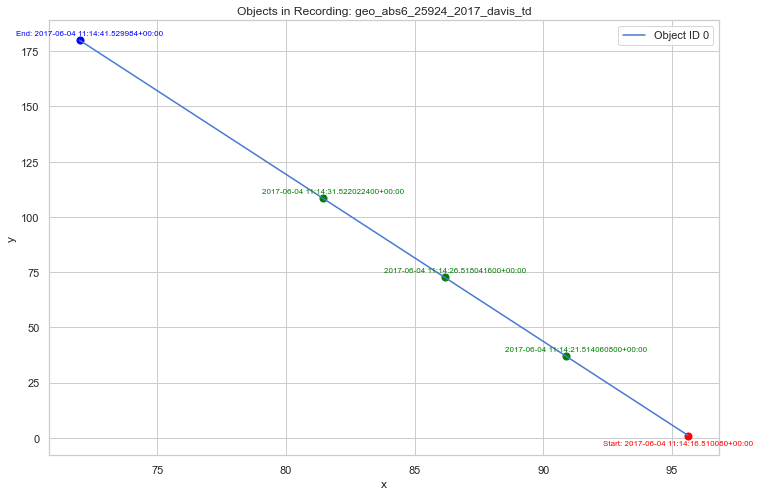

In [43]:
plot_rec_obj_1('geo_abs6_25924_2017_davis_td', [0])

Quezon City Event-Based Telescope simulation

In [44]:
import requests
import ephem

In [45]:

celestrak_active = "https://celestrak.org/NORAD/elements/gp.php?GROUP=active&FORMAT=tle"

data = requests.get(celestrak_active)
data = data.content.decode("utf-8")
rows = data.splitlines()

tles = {}
first = None
second = None
last = None
for row in rows:
    if not first:
        first = row
    elif not second:
        second = row
    else:
        last = row
        name = (first.split(",")[0]).strip()
        tles[name] = """%s
%s
%s""" % (first, second, last)
        first = None
        second= None

In [46]:
def orbital_passes(tle, start_time, end_time, station_location, resolution):
    observer = ephem.Observer()
    observer.lat = np.radians(station_location[0])
    observer.lon = np.radians(station_location[1])
    observer.elevation = station_location[2] / 1000.0  # Convert elevation to km

    lines = tle.split("\n")
    line_1 = lines[1]
    line_2 = lines[2]
    formatted_tle = [line_1, line_2]
    tle_data = formatted_tle

    timestamps = []
    azimuth_angles = []
    elevation_angles = []
    x_coords = []
    y_coords = []

    # Calculate positions at each time point
    while start_time <= end_time:
        observer.date = start_time
        tle = ephem.readtle("Name", tle_data[0], tle_data[1])
        tle.compute(observer)
        azimuth = np.degrees(float(tle.az))
        elevation = np.degrees(float(tle.alt))
        
        # Convert azimuth and elevation to x, y coordinates
        azimuth_rad = np.radians(azimuth)
        elevation_rad = np.radians(elevation)

        x = resolution[0] - (resolution[0] / 2) * np.sin(azimuth_rad) 
        y = resolution[1] - (resolution[1] * (elevation_rad / (np.pi / 2)))
        
        timestamps.append(ephem.Date(start_time).datetime())
        azimuth_angles.append(azimuth)
        elevation_angles.append(elevation)
        x_coords.append(x)
        y_coords.append(y)
        
        start_time += ephem.second

    simulated_eb = pd.DataFrame({
        'Timestamp': timestamps,
        'Elevation Angle': elevation_angles,
        'Azimuth Angle': azimuth_angles,
        'X Coordinate': x_coords,
        'Y Coordinate': y_coords
    })

    print(simulated_eb)
    return x_coords, y_coords, simulated_eb
    

def plot_trajectory(x_coords, y_coords, resolution, fov_horizontal, fov_vertical, simulated_eb, tle_name):
 
    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, label=f"{tle_name}", color='blue')
    plt.xlim(0, resolution[0])
    plt.ylim(0, resolution[1]) 
    plt.xlabel("X (pixels)")
    plt.ylabel("Y (pixels)")
    # plt.gca().invert_xaxis()
    plt.title("Satellite Position")
    plt.legend()
    plt.grid(True)
    
    # Find the indices of the visible trajectory within the plot boundaries
    visible_indices = np.where((np.array(x_coords) >= 0) & (np.array(x_coords) <= resolution[0]) &
                               (np.array(y_coords) >= 0) & (np.array(y_coords) <= resolution[1]))[0]
    
    # Extract the visible trajectory coordinates and corresponding timestamps
    visible_x = [x_coords[i] for i in visible_indices]
    visible_y = [y_coords[i] for i in visible_indices]
    visible_timestamps = [simulated_eb['Timestamp'].iloc[i] for i in visible_indices]
    
    plt.scatter(visible_x[0], visible_y[0], color='red', label='Start', zorder=5)
    plt.text(visible_x[0], visible_y[0], f"Start: {visible_timestamps[0]}", ha='right', va='bottom')

    plt.scatter(visible_x[-1], visible_y[-1], color='blue', label='End', zorder=5)
    plt.text(visible_x[-1], visible_y[-1], f"End: {visible_timestamps[-1]}", ha='right', va='top')

    plt.tight_layout()  
    plt.show()

    total_angular_size_horizontal = fov_horizontal * resolution[0]
    total_angular_size_vertical = fov_vertical * resolution[1]

    proportion_covered_horizontal = total_angular_size_horizontal / 360
    proportion_covered_vertical = total_angular_size_vertical / 180

    print("Proportion of Sky Covered (horizontal): {:.2f}".format(proportion_covered_horizontal))
    print("Proportion of Sky Covered (vertical): {:.2f}".format(proportion_covered_vertical))

                      Timestamp  Elevation Angle  Azimuth Angle  X Coordinate  \
0    2024-02-04 11:15:00.000000        43.538727     108.115119    125.947954   
1    2024-02-04 11:15:01.000000        43.538727     108.115126    125.947958   
2    2024-02-04 11:15:02.000001        43.538727     108.115133    125.947963   
3    2024-02-04 11:15:03.000001        43.538727     108.115133    125.947963   
4    2024-02-04 11:15:04.000001        43.538727     108.115140    125.947967   
...                         ...              ...            ...           ...   
3595 2024-02-04 12:14:55.000841        43.539167     108.129954    125.957618   
3596 2024-02-04 12:14:56.000841        43.539167     108.129954    125.957618   
3597 2024-02-04 12:14:57.000841        43.539167     108.129961    125.957623   
3598 2024-02-04 12:14:58.000841        43.539167     108.129961    125.957623   
3599 2024-02-04 12:14:59.000841        43.539171     108.129968    125.957627   

      Y Coordinate  
0     

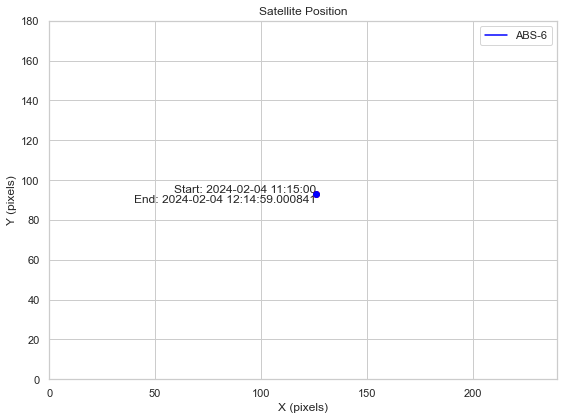

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [47]:
start_time = ephem.Date("2024-2-04 11:15:00")
end_time = ephem.Date("2024-2-04 12:15:00")
tle_name = "ABS-6"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Quezon City, Philippines
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

                       Timestamp  Elevation Angle  Azimuth Angle  \
0     2024-02-04 10:15:00.000000       -61.828491     305.522749   
1     2024-02-04 10:15:01.000000       -61.797810     305.546272   
2     2024-02-04 10:15:02.000001       -61.767129     305.569768   
3     2024-02-04 10:15:03.000001       -61.736441     305.593209   
4     2024-02-04 10:15:04.000001       -61.705753     305.616623   
...                          ...              ...            ...   
17995 2024-02-04 15:14:55.004207       -44.782873     322.703762   
17996 2024-02-04 15:14:56.004207       -44.760159     322.658901   
17997 2024-02-04 15:14:57.004207       -44.737445     322.614013   
17998 2024-02-04 15:14:58.004207       -44.714732     322.569153   
17999 2024-02-04 15:14:59.004207       -44.692021     322.524265   

       X Coordinate  Y Coordinate  
0        337.666187    303.656982  
1        337.637553    303.595620  
2        337.608936    303.534257  
3        337.580370    303.472881  
4  

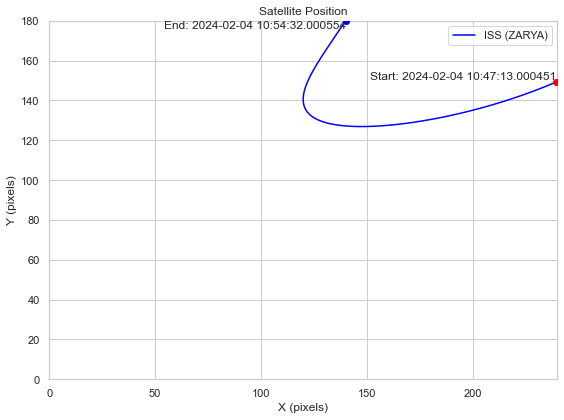

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [48]:
start_time = ephem.Date("2024-2-04 10:15:00")
end_time = ephem.Date("2024-2-04 15:15:00")
tle_name = "ISS (ZARYA)"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Quezon City, Philippines
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

                      Timestamp  Elevation Angle  Azimuth Angle  X Coordinate  \
0    2024-02-11 19:00:00.000000        31.823320       5.319472    228.874922   
1    2024-02-11 19:00:01.000000        31.823914       5.317928    228.878142   
2    2024-02-11 19:00:02.000000        31.824512       5.316384    228.881362   
3    2024-02-11 19:00:03.000001        31.825106       5.314840    228.884582   
4    2024-02-11 19:00:04.000001        31.825704       5.313296    228.887802   
...                         ...              ...            ...           ...   
7135 2024-02-11 20:58:55.001668        33.067483     352.833038    254.971337   
7136 2024-02-11 20:58:56.001668        33.067196     352.831207    254.975141   
7137 2024-02-11 20:58:57.001668        33.066909     352.829377    254.978944   
7138 2024-02-11 20:58:58.001668        33.066623     352.827546    254.982748   
7139 2024-02-11 20:58:59.001668        33.066336     352.825716    254.986552   

      Y Coordinate  
0     

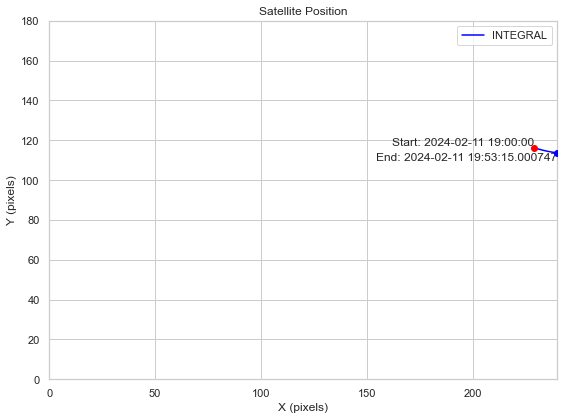

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [49]:
start_time = ephem.Date("2024-2-11 19:00:00")
end_time = ephem.Date("2024-2-11 20:59:00")
tle_name = "INTEGRAL"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Adelaide
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

                      Timestamp  Elevation Angle  Azimuth Angle  X Coordinate  \
0    2024-02-11 19:00:00.000000        25.346028      45.111808    154.981765   
1    2024-02-11 19:00:01.000000        25.348205      45.109206    154.985611   
2    2024-02-11 19:00:02.000000        25.350380      45.106603    154.989458   
3    2024-02-11 19:00:03.000001        25.352557      45.104001    154.993305   
4    2024-02-11 19:00:04.000001        25.354733      45.101399    154.997152   
...                         ...              ...            ...           ...   
7135 2024-02-11 20:58:55.001668        33.617279      24.140861    190.922237   
7136 2024-02-11 20:58:56.001668        33.617365      24.137904    190.927889   
7137 2024-02-11 20:58:57.001668        33.617453      24.134946    190.933542   
7138 2024-02-11 20:58:58.001668        33.617539      24.131989    190.939195   
7139 2024-02-11 20:58:59.001668        33.617624      24.129031    190.944848   

      Y Coordinate  
0     

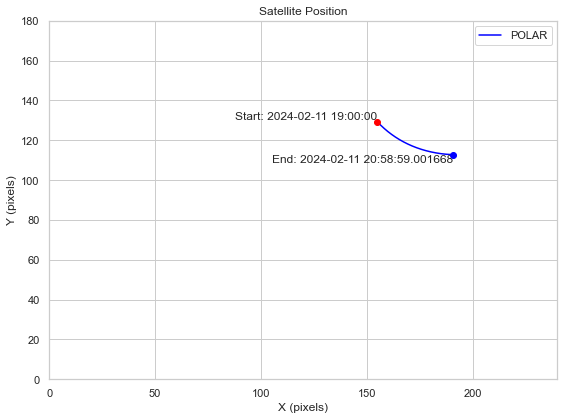

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [50]:
start_time = ephem.Date("2024-2-11 19:00:00")
end_time = ephem.Date("2024-2-11 20:59:00")
tle_name = "POLAR"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Adelaide
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

                      Timestamp  Elevation Angle  Azimuth Angle  X Coordinate  \
0    2024-02-11 19:00:00.000000        -2.377639      54.249532    142.611695   
1    2024-02-11 19:00:01.000000        -2.375293      54.250642    142.610336   
2    2024-02-11 19:00:02.000000        -2.372949      54.251752    142.608978   
3    2024-02-11 19:00:03.000001        -2.370608      54.252862    142.607620   
4    2024-02-11 19:00:04.000001        -2.368270      54.253972    142.606262   
...                         ...              ...            ...           ...   
7135 2024-02-11 20:58:55.001668        18.771474      59.382805    136.729293   
7136 2024-02-11 20:58:56.001668        18.774728      59.383140    136.728936   
7137 2024-02-11 20:58:57.001668        18.777983      59.383475    136.728579   
7138 2024-02-11 20:58:58.001668        18.781239      59.383809    136.728222   
7139 2024-02-11 20:58:59.001668        18.784494      59.384144    136.727865   

      Y Coordinate  
0     

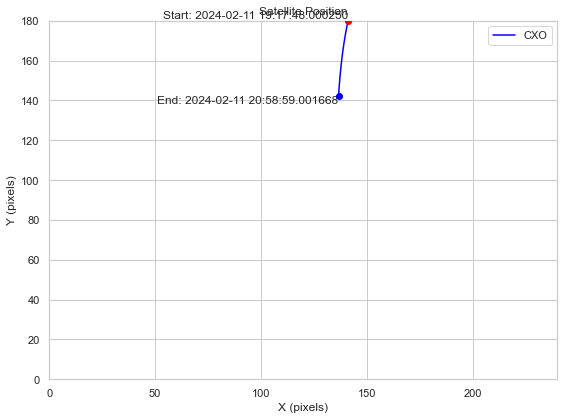

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [51]:
start_time = ephem.Date("2024-2-11 19:00:00")
end_time = ephem.Date("2024-2-11 20:59:00")
tle_name = "CXO"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Adelaide
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

                       Timestamp  Elevation Angle  Azimuth Angle  \
0     2024-02-04 10:15:00.000000        70.179606     161.141825   
1     2024-02-04 10:15:01.000000        70.179784     161.141661   
2     2024-02-04 10:15:02.000001        70.179961     161.141484   
3     2024-02-04 10:15:03.000001        70.180139     161.141306   
4     2024-02-04 10:15:04.000001        70.180317     161.141142   
...                          ...              ...            ...   
17995 2024-02-04 15:14:55.004207        73.668330     157.175862   
17996 2024-02-04 15:14:56.004207        73.668481     157.175644   
17997 2024-02-04 15:14:57.004207        73.668631     157.175425   
17998 2024-02-04 15:14:58.004207        73.668781     157.175207   
17999 2024-02-04 15:14:59.004207        73.668931     157.174988   

       X Coordinate  Y Coordinate  
0        201.212796     39.640787  
1        201.212471     39.640432  
2        201.212119     39.640077  
3        201.211767     39.639722  
4  

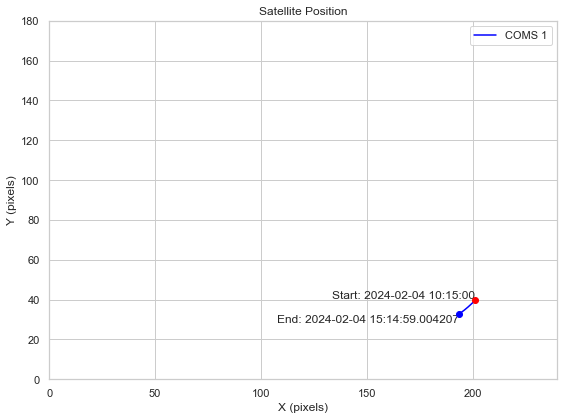

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [52]:
start_time = ephem.Date("2024-2-04 10:15:00")
end_time = ephem.Date("2024-2-04 15:15:00")
tle_name = "COMS 1"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Quezon City, Philippines
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

**Centered object**

In [53]:
def orbital_passes_center(tle, start_time, end_time, station_location, resolution):
    observer = ephem.Observer()
    observer.lat = np.radians(station_location[0])
    observer.lon = np.radians(station_location[1])
    observer.elevation = station_location[2] / 1000.0  # Convert elevation to km

    lines = tle.split("\n")
    line_1 = lines[1]
    line_2 = lines[2]
    formatted_tle = [line_1, line_2]
    tle_data = formatted_tle

    timestamps = []
    azimuth_angles = []
    elevation_angles = []
    x_coords = []
    y_coords = []

    # Calculate positions at each time point
    while start_time <= end_time:
        observer.date = start_time
        tle = ephem.readtle("Name", tle_data[0], tle_data[1])
        tle.compute(observer)
        azimuth = np.degrees(float(tle.az))
        elevation = np.degrees(float(tle.alt))
        
        # Converting azimuth and elevation to x, y coordinates
        delta_azimuth = azimuth - azimuth_angles[-1] if azimuth_angles else 0
        delta_elevation = elevation - elevation_angles[-1] if elevation_angles else 0

        delta_azimuth_arcmin = delta_azimuth * 60  # Degrees to arcminutes
        delta_elevation_arcmin = delta_elevation * 60  # Degrees to arcminutes

        # Starts at the center and shifts the coordinate based on the azimuth angle
        delta_x = delta_azimuth_arcmin / (7.44 / resolution[0])  # Arcminutes per pixel; 
        delta_y = delta_elevation_arcmin / (5.58 / resolution[1])  # Arcminutes per pixel

        x = resolution[0] / 2 + delta_x if x_coords else resolution[0] / 2
        y = resolution[1] / 2 + delta_y if y_coords else resolution[1] / 2
        
        timestamps.append(ephem.Date(start_time).datetime())
        azimuth_angles.append(azimuth)
        elevation_angles.append(elevation)
        x_coords.append(x)
        y_coords.append(y)
        
        start_time += ephem.second

    simulated_eb = pd.DataFrame({
        'Timestamp': timestamps,
        'Elevation Angle': elevation_angles,
        'Azimuth Angle': azimuth_angles,
        'X Coordinate': x_coords,
        'Y Coordinate': y_coords
    })

    print(simulated_eb)
    return x_coords, y_coords, simulated_eb


def plot_trajectory_center(x_coords, y_coords, resolution, fov_horizontal, fov_vertical, simulated_eb, tle_name):
 
    plt.figure(figsize=(8, 6))
    
    plt.plot(x_coords, y_coords, label=f"{tle_name}", color='blue')
    plt.xlim(0, resolution[0])
    plt.ylim(0, resolution[1]) 
    plt.xlabel("X (pixels)")
    plt.ylabel("Y (pixels)")
    plt.title("Satellite Position")
    plt.legend()
    plt.grid(True)
    
    # Find the indices of the visible trajectory within the plot boundaries
    visible_indices = np.where((np.array(x_coords) >= 0) & (np.array(x_coords) <= resolution[0]) &
                               (np.array(y_coords) >= 0) & (np.array(y_coords) <= resolution[1]))[0]
    
    # Extract the visible trajectory coordinates and corresponding timestamps
    visible_x = [x_coords[i] for i in visible_indices]
    visible_y = [y_coords[i] for i in visible_indices]
    visible_timestamps = [simulated_eb['Timestamp'].iloc[i] for i in visible_indices]
    
    plt.scatter(visible_x[0], visible_y[0], color='red', label='Start', zorder=5)
    plt.text(visible_x[0], visible_y[0], f"Start: {visible_timestamps[0]}", ha='right', va='bottom')

    plt.scatter(visible_x[-1], visible_y[-1], color='blue', label='End', zorder=5)
    plt.text(visible_x[-1], visible_y[-1], f"End: {visible_timestamps[-1]}", ha='right', va='top')

    plt.tight_layout()  
    plt.show()

    total_angular_size_horizontal = fov_horizontal * resolution[0]
    total_angular_size_vertical = fov_vertical * resolution[1]

    proportion_covered_horizontal = total_angular_size_horizontal / 360
    proportion_covered_vertical = total_angular_size_vertical / 180

    print("Proportion of Sky Covered (horizontal): {:.2f}".format(proportion_covered_horizontal))
    print("Proportion of Sky Covered (vertical): {:.2f}".format(proportion_covered_vertical))


                       Timestamp  Elevation Angle  Azimuth Angle  \
0     2024-02-04 11:15:00.000000       -46.403113     139.645417   
1     2024-02-04 11:15:01.000000       -46.435809     139.647876   
2     2024-02-04 11:15:02.000001       -46.468502     139.650335   
3     2024-02-04 11:15:03.000001       -46.501195     139.652780   
4     2024-02-04 11:15:04.000001       -46.533884     139.655225   
...                          ...              ...            ...   
86395 2024-02-05 11:14:55.020195       -41.523630     320.895647   
86396 2024-02-05 11:14:56.020195       -41.490595     320.893297   
86397 2024-02-05 11:14:57.020195       -41.457561     320.890921   
86398 2024-02-05 11:14:58.020197       -41.424524     320.888544   
86399 2024-02-05 11:14:59.020197       -41.391483     320.886167   

       X Coordinate  Y Coordinate  
0        120.000000     90.000000  
1        124.759100     26.717196  
2        124.759100     26.723806  
3        124.732660     26.723806  
4  

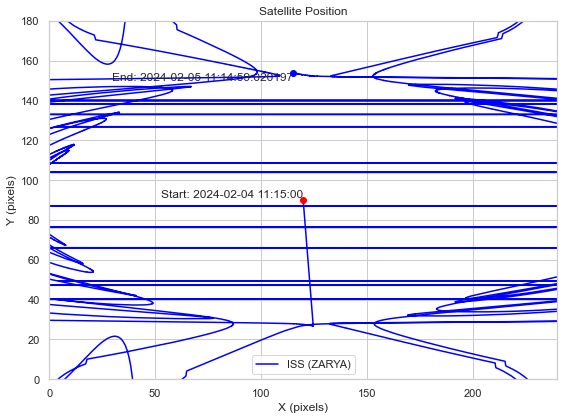

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [54]:
start_time = ephem.Date("2024-2-04 11:15:00")
end_time = ephem.Date("2024-2-05 11:15:00")
tle_name = "ISS (ZARYA)"

x_coords, y_coords, simulated_eb = orbital_passes_center(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Quezon City, Philippines
plot_trajectory_center(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

**Centered plot**

Check if the azimuth is correct

THIS IS WRONG!! THE FIELD OF VIEW IS IS JUST 0.08 x 0.09 degrees, the flyby should be short and quick !! 

In [55]:
import numpy as np
import pandas as pd
import ephem
import matplotlib.pyplot as plt

def orbital_passes(tle, start_time, end_time, station_location, resolution):
    observer = ephem.Observer()
    observer.lat = np.radians(station_location[0])
    observer.lon = np.radians(station_location[1])
    observer.elevation = station_location[2] / 1000.0  # Convert elevation to km

    lines = tle.split("\n")
    line_1 = lines[1]
    line_2 = lines[2]
    formatted_tle = [line_1, line_2]
    tle_data = formatted_tle

    timestamps = []
    azimuth_angles = []
    elevation_angles = []
    x_coords = []
    y_coords = []

    # Calculate positions at each time point
    while start_time <= end_time:
        observer.date = start_time
        tle = ephem.readtle("Name", tle_data[0], tle_data[1])
        tle.compute(observer)
        azimuth = np.degrees(float(tle.az))
        elevation = np.degrees(float(tle.alt))
        
        # Convert azimuth and elevation to x, y coordinates
        azimuth_rad = np.radians(azimuth)
        elevation_rad = np.radians(elevation)

        x = resolution[0] - (resolution[0] / 2) * np.sin(azimuth_rad) 
        y = resolution[1] / 2 - (resolution[1] / 2) * (1 - np.sin(elevation_rad))  # Adjusted y-coordinate
        
        timestamps.append(ephem.Date(start_time).datetime())
        azimuth_angles.append(azimuth)
        elevation_angles.append(elevation)
        x_coords.append(x)
        y_coords.append(y)
        
        start_time += ephem.second

    # Calculate the difference between the desired starting point and the actual starting point
    delta_x = 120 - x_coords[0]
    delta_y = 90 - y_coords[0]

    # Adjust all coordinates accordingly
    x_coords = [x + delta_x for x in x_coords]
    y_coords = [y + delta_y for y in y_coords]

    simulated_eb = pd.DataFrame({
        'Timestamp': timestamps,
        'Elevation Angle': elevation_angles,
        'Azimuth Angle': azimuth_angles,
        'X Coordinate': x_coords,
        'Y Coordinate': y_coords
    })

    print(simulated_eb)
    return x_coords, y_coords, simulated_eb


def plot_trajectory(x_coords, y_coords, resolution, fov_horizontal, fov_vertical, simulated_eb, tle_name):
    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, label=f"{tle_name}", color='blue')
    plt.xlim(0, resolution[0])
    plt.ylim(0, resolution[1]) 
    plt.xlabel("X (pixels)")
    plt.ylabel("Y (pixels)")
    # plt.gca().invert_yaxis()  # Uncomment this line if you want to invert the y-axis
    plt.title("Satellite Position")
    plt.legend()
    plt.grid(True)
    
    # Find the indices of the visible trajectory within the plot boundaries
    visible_indices = np.where((np.array(x_coords) >= 0) & (np.array(x_coords) <= resolution[0]) &
                               (np.array(y_coords) >= 0) & (np.array(y_coords) <= resolution[1]))[0]
    
    # Extract the visible trajectory coordinates and corresponding timestamps
    visible_x = [x_coords[i] for i in visible_indices]
    visible_y = [y_coords[i] for i in visible_indices]
    visible_timestamps = [simulated_eb['Timestamp'].iloc[i] for i in visible_indices]
    
    plt.scatter(visible_x[0], visible_y[0], color='red', label='Start', zorder=5)
    plt.text(visible_x[0], visible_y[0], f"Start: {visible_timestamps[0]}", ha='left', va='bottom')

    plt.scatter(visible_x[-1], visible_y[-1], color='blue', label='End', zorder=5)
    plt.text(visible_x[-1], visible_y[-1], f"End: {visible_timestamps[-1]}", ha='right', va='top')

    plt.tight_layout()  
    plt.show()

    total_angular_size_horizontal = fov_horizontal * resolution[0]
    total_angular_size_vertical = fov_vertical * resolution[1]

    proportion_covered_horizontal = total_angular_size_horizontal / 360
    proportion_covered_vertical = total_angular_size_vertical / 180

    print("Proportion of Sky Covered (horizontal): {:.2f}".format(proportion_covered_horizontal))
    print("Proportion of Sky Covered (vertical): {:.2f}".format(proportion_covered_vertical))

                       Timestamp  Elevation Angle  Azimuth Angle  \
0     2024-02-11 17:00:00.000000        43.528437     108.039598   
1     2024-02-11 17:00:01.000000        43.528440     108.039591   
2     2024-02-11 17:00:02.000001        43.528444     108.039591   
3     2024-02-11 17:00:03.000001        43.528451     108.039584   
4     2024-02-11 17:00:04.000001        43.528454     108.039577   
...                          ...              ...            ...   
10795 2024-02-11 19:59:55.002524        43.564237     107.973768   
10796 2024-02-11 19:59:56.002524        43.564241     107.973761   
10797 2024-02-11 19:59:57.002524        43.564241     107.973755   
10798 2024-02-11 19:59:58.002524        43.564244     107.973755   
10799 2024-02-11 19:59:59.002524        43.564248     107.973748   

       X Coordinate  Y Coordinate  
0        120.000000     90.000000  
1        119.999996     90.000004  
2        119.999996     90.000008  
3        119.999991     90.000016  
4  

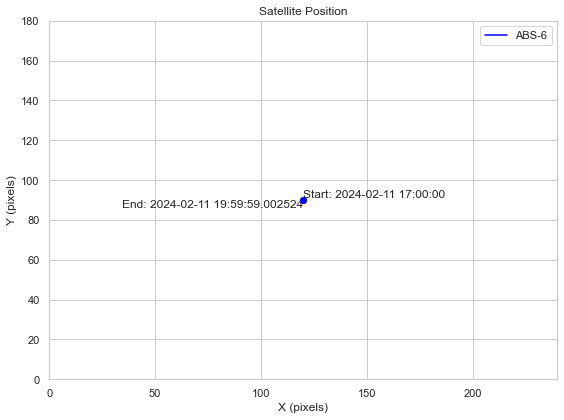

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [56]:
start_time = ephem.Date("2024-2-11 17:00:00")
end_time = ephem.Date("2024-2-11 20:00:00")
tle_name = "ABS-6"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Adelaide
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

                       Timestamp  Elevation Angle  Azimuth Angle  \
0     2024-02-11 17:00:00.000000       -26.710606     117.332664   
1     2024-02-11 17:00:01.000000       -26.716553     117.261972   
2     2024-02-11 17:00:02.000001       -26.722521     117.191293   
3     2024-02-11 17:00:03.000001       -26.728509     117.120641   
4     2024-02-11 17:00:04.000001       -26.734516     117.049990   
...                          ...              ...            ...   
10795 2024-02-11 19:59:55.002524       -19.407146     191.711061   
10796 2024-02-11 19:59:56.002524       -19.375331     191.667266   
10797 2024-02-11 19:59:57.002524       -19.343514     191.623389   
10798 2024-02-11 19:59:58.002524       -19.311692     191.579457   
10799 2024-02-11 19:59:59.002524       -19.279870     191.535443   

       X Coordinate  Y Coordinate  
0        120.000000     90.000000  
1        119.932099     89.991655  
2        119.864374     89.983282  
3        119.796838     89.974880  
4  

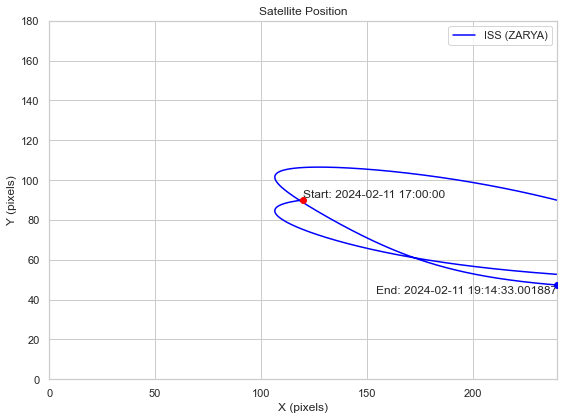

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [57]:
start_time = ephem.Date("2024-2-11 17:00:00")
end_time = ephem.Date("2024-2-11 20:00:00")
tle_name = "ISS (ZARYA)"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Adelaide
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

                      Timestamp  Elevation Angle  Azimuth Angle  X Coordinate  \
0    2024-02-11 17:00:00.000000       -39.161791     262.694622    120.000000   
1    2024-02-11 17:00:01.000000       -39.131516     262.677328    119.995389   
2    2024-02-11 17:00:02.000001       -39.101242     262.660006    119.990760   
3    2024-02-11 17:00:03.000001       -39.070960     262.642712    119.986127   
4    2024-02-11 17:00:04.000001       -39.040678     262.625391    119.981476   
...                         ...              ...            ...           ...   
3595 2024-02-11 17:59:55.000841       -59.115219      73.961666   -114.355149   
3596 2024-02-11 17:59:56.000841       -59.144234      73.940466   -114.342874   
3597 2024-02-11 17:59:57.000841       -59.173255      73.919244   -114.330570   
3598 2024-02-11 17:59:58.000841       -59.202263      73.897995   -114.318235   
3599 2024-02-11 17:59:59.000841       -59.231278      73.876719   -114.305869   

      Y Coordinate  
0     

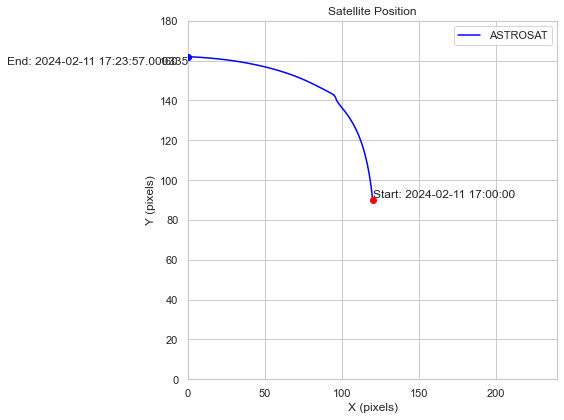

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [58]:
start_time = ephem.Date("2024-2-11 17:00:00")
end_time = ephem.Date("2024-2-11 18:00:00")
tle_name = "ASTROSAT"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Adelaide
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

                      Timestamp  Elevation Angle  Azimuth Angle  X Coordinate  \
0    2024-02-11 17:00:00.000000        25.405073      13.807188    120.000000   
1    2024-02-11 17:00:01.000000        25.406183      13.806401    120.001601   
2    2024-02-11 17:00:02.000001        25.407293      13.805615    120.003200   
3    2024-02-11 17:00:03.000001        25.408404      13.804828    120.004800   
4    2024-02-11 17:00:04.000001        25.409514      13.804041    120.006401   
...                         ...              ...            ...           ...   
3595 2024-02-11 17:59:55.000841        29.072751      10.261201    127.262326   
3596 2024-02-11 17:59:56.000841        29.073663      10.260016    127.264768   
3597 2024-02-11 17:59:57.000841        29.074575      10.258831    127.267210   
3598 2024-02-11 17:59:58.000841        29.075484      10.257646    127.269652   
3599 2024-02-11 17:59:59.000841        29.076395      10.256461    127.272095   

      Y Coordinate  
0     

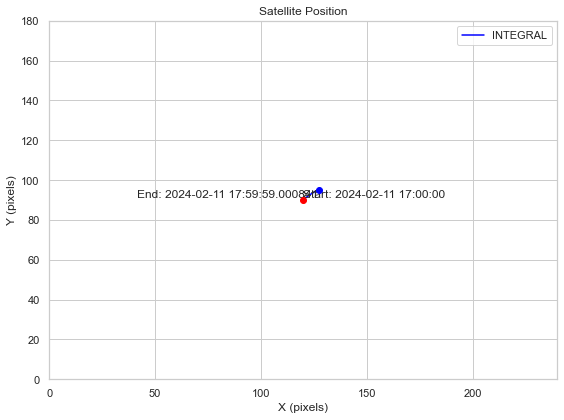

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [59]:
start_time = ephem.Date("2024-2-11 17:00:00")
end_time = ephem.Date("2024-2-11 18:00:00")
tle_name = "INTEGRAL"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Adelaide
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

                      Timestamp  Elevation Angle  Azimuth Angle  X Coordinate  \
0    2024-02-11 17:00:00.000000         4.244009      60.090078    120.000000   
1    2024-02-11 17:00:01.000000         4.247485      60.088418    120.001733   
2    2024-02-11 17:00:02.000001         4.250961      60.086759    120.003467   
3    2024-02-11 17:00:03.000001         4.254437      60.085099    120.005200   
4    2024-02-11 17:00:04.000001         4.257913      60.083439    120.006934   
...                         ...              ...            ...           ...   
3595 2024-02-11 17:59:55.000841        15.988923      53.489872    127.567046   
3596 2024-02-11 17:59:56.000841        15.991898      53.487819    127.569603   
3597 2024-02-11 17:59:57.000841        15.994872      53.485767    127.572161   
3598 2024-02-11 17:59:58.000841        15.997848      53.483714    127.574719   
3599 2024-02-11 17:59:59.000841        16.000821      53.481658    127.577281   

      Y Coordinate  
0     

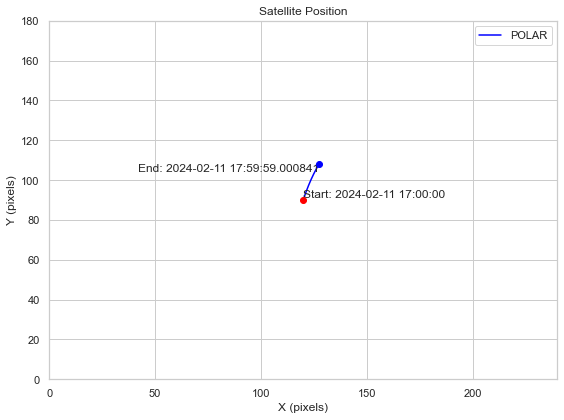

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [60]:
start_time = ephem.Date("2024-2-11 17:00:00")
end_time = ephem.Date("2024-2-11 18:00:00")
tle_name = "POLAR"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Adelaide
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

                      Timestamp  Elevation Angle  Azimuth Angle  X Coordinate  \
0    2024-02-11 17:00:00.000000       -23.840879      42.785497    120.000000   
1    2024-02-11 17:00:01.000000       -23.838400      42.787645    119.996698   
2    2024-02-11 17:00:02.000001       -23.835921      42.789796    119.993391   
3    2024-02-11 17:00:03.000001       -23.833443      42.791945    119.990090   
4    2024-02-11 17:00:04.000001       -23.830964      42.794096    119.986783   
...                         ...              ...            ...           ...   
3595 2024-02-11 17:59:55.000841       -14.317273      49.440239    110.343287   
3596 2024-02-11 17:59:56.000841       -14.314475      49.441813    110.341143   
3597 2024-02-11 17:59:57.000841       -14.311675      49.443388    110.338999   
3598 2024-02-11 17:59:58.000841       -14.308877      49.444959    110.336860   
3599 2024-02-11 17:59:59.000841       -14.306077      49.446533    110.334716   

      Y Coordinate  
0     

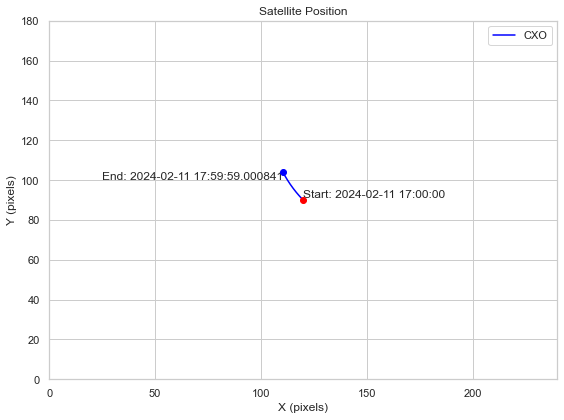

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [61]:
start_time = ephem.Date("2024-2-11 17:00:00")
end_time = ephem.Date("2024-2-11 18:00:00")
tle_name = "CXO"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Adelaide
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

                      Timestamp  Elevation Angle  Azimuth Angle  X Coordinate  \
0    2024-02-11 17:00:00.000000       -75.645814     221.799369    120.000000   
1    2024-02-11 17:00:01.000000       -75.648395     221.789520    119.984621   
2    2024-02-11 17:00:02.000001       -75.650977     221.779671    119.969240   
3    2024-02-11 17:00:03.000001       -75.653559     221.769822    119.953856   
4    2024-02-11 17:00:04.000001       -75.656134     221.759959    119.938449   
...                         ...              ...            ...           ...   
3595 2024-02-11 17:59:55.000841       -79.282500     162.254504      3.442357   
3596 2024-02-11 17:59:56.000841       -79.281400     162.236295      3.406036   
3597 2024-02-11 17:59:57.000841       -79.280301     162.218099      3.369746   
3598 2024-02-11 17:59:58.000841       -79.279208     162.199917      3.333487   
3599 2024-02-11 17:59:59.000841       -79.278108     162.181722      3.297204   

      Y Coordinate  
0     

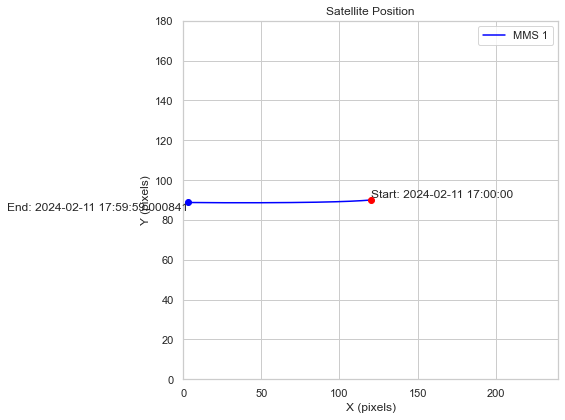

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [62]:
start_time = ephem.Date("2024-2-11 17:00:00")
end_time = ephem.Date("2024-2-11 18:00:00")
tle_name = "MMS 1"

x_coords, y_coords, simulated_eb = orbital_passes(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Adelaide
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

In [63]:
def orbital_passes_star_tracking(tle, start_time, end_time, station_location, resolution):
    observer = ephem.Observer()
    observer.lat = np.radians(station_location[0])
    observer.lon = np.radians(station_location[1])
    observer.elevation = station_location[2] / 1000.0  # Convert elevation to km

    lines = tle.split("\n")
    line_1 = lines[1]
    line_2 = lines[2]
    formatted_tle = [line_1, line_2]
    tle_data = formatted_tle

    timestamps = []
    azimuth_angles = []
    elevation_angles = []
    x_coords = []
    y_coords = []

    # Calculate positions at each time point with star tracking
    while start_time <= end_time:
        observer.date = start_time

        # Adjust observer's position for Earth's rotation
        observer.lon += ephem.degrees('15:04:00')  # Earth's rotation rate

        tle = ephem.readtle("Name", tle_data[0], tle_data[1])
        tle.compute(observer)
        azimuth = np.degrees(float(tle.az))
        elevation = np.degrees(float(tle.alt))

        # Convert azimuth and elevation to x, y coordinates
        azimuth_rad = np.radians(azimuth)
        elevation_rad = np.radians(elevation)

        x = resolution[0] - (resolution[0] / 2) * np.sin(azimuth_rad)
        y = resolution[1] / 2 - (resolution[1] / 2) * (1 - np.sin(elevation_rad))  # Adjusted y-coordinate

        timestamps.append(ephem.Date(start_time).datetime())
        azimuth_angles.append(azimuth)
        elevation_angles.append(elevation)
        x_coords.append(x)
        y_coords.append(y)

        start_time += ephem.second

    # Calculate the difference between the desired starting point and the actual starting point
    delta_x = 120 - x_coords[0]
    delta_y = 90 - y_coords[0]

    # Adjust all coordinates accordingly
    x_coords = [x + delta_x for x in x_coords]
    y_coords = [y + delta_y for y in y_coords]

    simulated_eb = pd.DataFrame({
        'Timestamp': timestamps,
        'Elevation Angle': elevation_angles,
        'Azimuth Angle': azimuth_angles,
        'X Coordinate': x_coords,
        'Y Coordinate': y_coords
    })

    print(simulated_eb)
    return x_coords, y_coords, simulated_eb


def plot_trajectory(x_coords, y_coords, resolution, fov_horizontal, fov_vertical, simulated_eb, tle_name):
    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, label=f"{tle_name}", color='blue')


    plt.xlim(min(x_coords) - 10, max(x_coords) + 10)
    plt.ylim(min(y_coords) - 10, max(y_coords) + 10)

    plt.xlabel("X (pixels)")
    plt.ylabel("Y (pixels)")
    plt.title("Satellite Position")
    plt.legend()
    plt.grid(True)
    
    visible_indices = np.where((np.array(x_coords) >= min(x_coords)) & (np.array(x_coords) <= max(x_coords)) &
                               (np.array(y_coords) >= min(y_coords)) & (np.array(y_coords) <= max(y_coords)))[0]
    
    visible_x = [x_coords[i] for i in visible_indices]
    visible_y = [y_coords[i] for i in visible_indices]
    visible_timestamps = [simulated_eb['Timestamp'].iloc[i] for i in visible_indices]
    
    plt.scatter(visible_x[0], visible_y[0], color='red', label='Start', zorder=5)
    plt.text(visible_x[0], visible_y[0], f"Start: {visible_timestamps[0]}", ha='left', va='bottom')

    plt.scatter(visible_x[-1], visible_y[-1], color='blue', label='End', zorder=5)
    plt.text(visible_x[-1], visible_y[-1], f"End: {visible_timestamps[-1]}", ha='right', va='top')

    plt.tight_layout()  
    plt.show()

    total_angular_size_horizontal = fov_horizontal * resolution[0]
    total_angular_size_vertical = fov_vertical * resolution[1]

    proportion_covered_horizontal = total_angular_size_horizontal / 360
    proportion_covered_vertical = total_angular_size_vertical / 180

    print("Proportion of Sky Covered (horizontal): {:.2f}".format(proportion_covered_horizontal))
    print("Proportion of Sky Covered (vertical): {:.2f}".format(proportion_covered_vertical))

                       Timestamp  Elevation Angle  Azimuth Angle  \
0     2024-02-11 17:00:00.000000        58.610502     121.068463   
1     2024-02-11 17:00:01.000000        70.598584     151.831062   
2     2024-02-11 17:00:02.000001        70.790615     207.008581   
3     2024-02-11 17:00:03.000001        58.959395     238.471929   
4     2024-02-11 17:00:04.000001        43.905682     251.735638   
...                          ...              ...            ...   
10795 2024-02-11 19:59:55.002524       -16.181399      87.894610   
10796 2024-02-11 19:59:56.002524        -1.074961      91.726353   
10797 2024-02-11 19:59:57.002524        12.874238      95.797686   
10798 2024-02-11 19:59:58.002524        28.070527     100.775787   
10799 2024-02-11 19:59:59.002524        43.564248     107.973748   

       X Coordinate  Y Coordinate  
0        120.000000     90.000000  
1        166.137402     98.061135  
2        277.281024     98.160858  
3        325.072241     90.284022  
4  

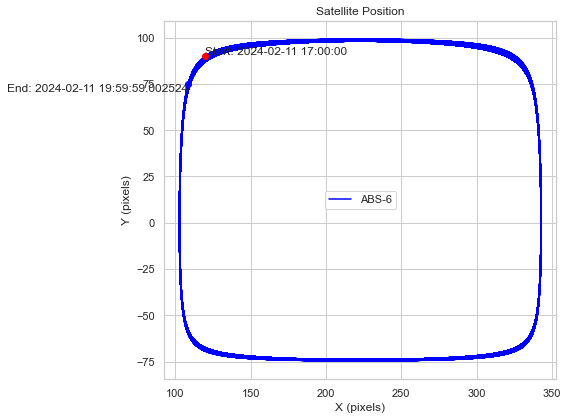

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [64]:

start_time = ephem.Date("2024-2-11 17:00:00")
end_time = ephem.Date("2024-2-11 20:00:00")
tle_name = "ABS-6"

x_coords, y_coords, simulated_eb = orbital_passes_star_tracking(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Adelaide
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV

                       Timestamp  Elevation Angle  Azimuth Angle  \
0     2024-02-11 17:00:00.000000       -19.543825     126.916157   
1     2024-02-11 17:00:01.000000       -12.998546     142.015465   
2     2024-02-11 17:00:02.000001        -8.455381     165.630120   
3     2024-02-11 17:00:03.000001        -8.445166     194.654914   
4     2024-02-11 17:00:04.000001       -12.976747     218.315276   
...                          ...              ...            ...   
10795 2024-02-11 19:59:55.002524       -30.584733     134.451318   
10796 2024-02-11 19:59:56.002524       -25.240592     144.144558   
10797 2024-02-11 19:59:57.002524       -21.086249     157.356835   
10798 2024-02-11 19:59:58.002524       -18.889809     173.875975   
10799 2024-02-11 19:59:59.002524       -19.279870     191.535443   

       X Coordinate  Y Coordinate  
0        120.000000     90.000000  
1        142.087987     99.864131  
2        186.160157    106.873975  
3        246.301443    106.889846  
4  

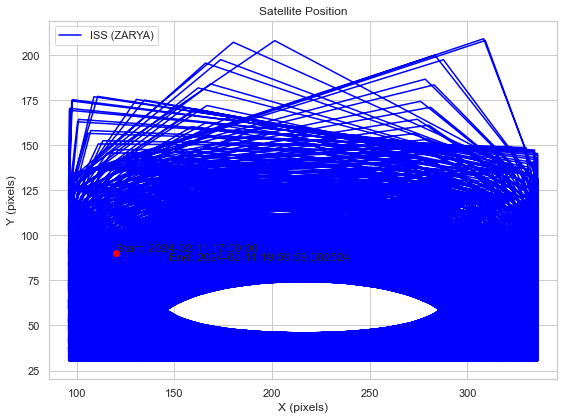

Proportion of Sky Covered (horizontal): 0.08
Proportion of Sky Covered (vertical): 0.09


In [65]:

start_time = ephem.Date("2024-2-11 17:00:00")
end_time = ephem.Date("2024-2-11 20:00:00")
tle_name = "ISS (ZARYA)"

x_coords, y_coords, simulated_eb = orbital_passes_star_tracking(tles[tle_name], start_time, end_time, (14.65, 121.05, 0), (240, 180)) # Adelaide
plot_trajectory(x_coords, y_coords, (240, 180), 0.124, 0.093, simulated_eb, tle_name) # DAVIS resolution and FOV